The gold price data is available from the World Gold Council at https://www.gold.org/goldhub/data/gold-prices
For all timeseries modeling gold price in USD is used here.

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
import statsmodels as sm
warnings.filterwarnings('ignore')
pd.plotting.register_matplotlib_converters()


excel_file = pd.ExcelFile("Gold_price_averages_in_a range_of_currencies_since_1978.xlsx")
print(excel_file.sheet_names)

['Disclaimer', 'Yearly_Avg', 'Quarterly_Avg', 'Monthly_Avg', 'Monthly-Avg-USD']


In [11]:
sheet_name = 'Monthly-Avg-USD'
df = excel_file.parse(sheet_name)
df.head()

Date   Price
0 1978-01-31  207.83
1 1978-02-28  227.27
2 1978-03-31  245.67
3 1978-04-28  242.05
4 1978-05-31  239.16

In [12]:
df['Year'] = df['Date'].dt.year
df.head()

Date   Price  Year
0 1978-01-31  207.83  1978
1 1978-02-28  227.27  1978
2 1978-03-31  245.67  1978
3 1978-04-28  242.05  1978
4 1978-05-31  239.16  1978

In [13]:
# Calculate the average price by year
yearly_avg = df.groupby('Year')['Price'].mean().round(2).reset_index()

In [5]:
yearly_avg.head()

Year   Price
0  1978  286.08
1  1979  600.91
2  1980  475.12
3  1981  372.94
4  1982  428.85

In [14]:
yearly_avg['Price'].describe().T

count      48.000000
mean      825.180833
std       652.206809
min       270.990000
25%       363.027500
50%       440.590000
75%      1259.397500
max      2948.790000
Name: Price, dtype: float64

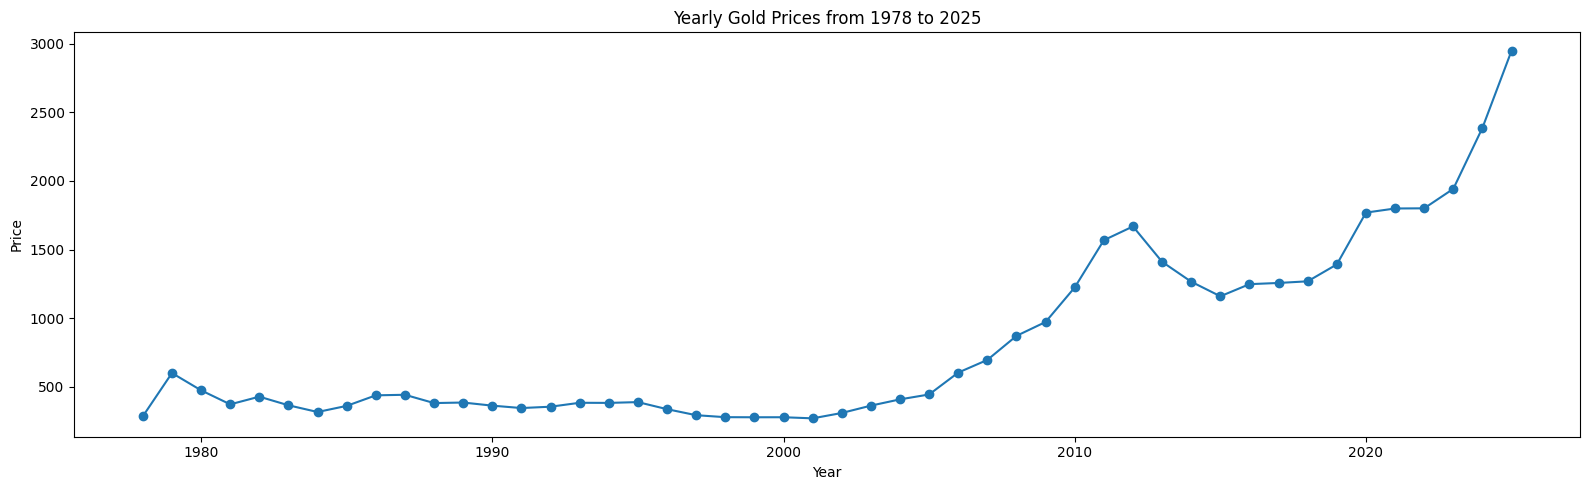

In [15]:
# Plotting the data
plt.figure(figsize=(16, 5))
plt.plot(yearly_avg['Year'], yearly_avg['Price'], marker='o')

# Add title and labels
plt.title('Yearly Gold Prices from 1978 to 2025')
plt.xlabel('Year')
plt.ylabel('Price')

# Enable Grid View
plt.grid(False)

# Show the plot
plt.tight_layout()
plt.show()


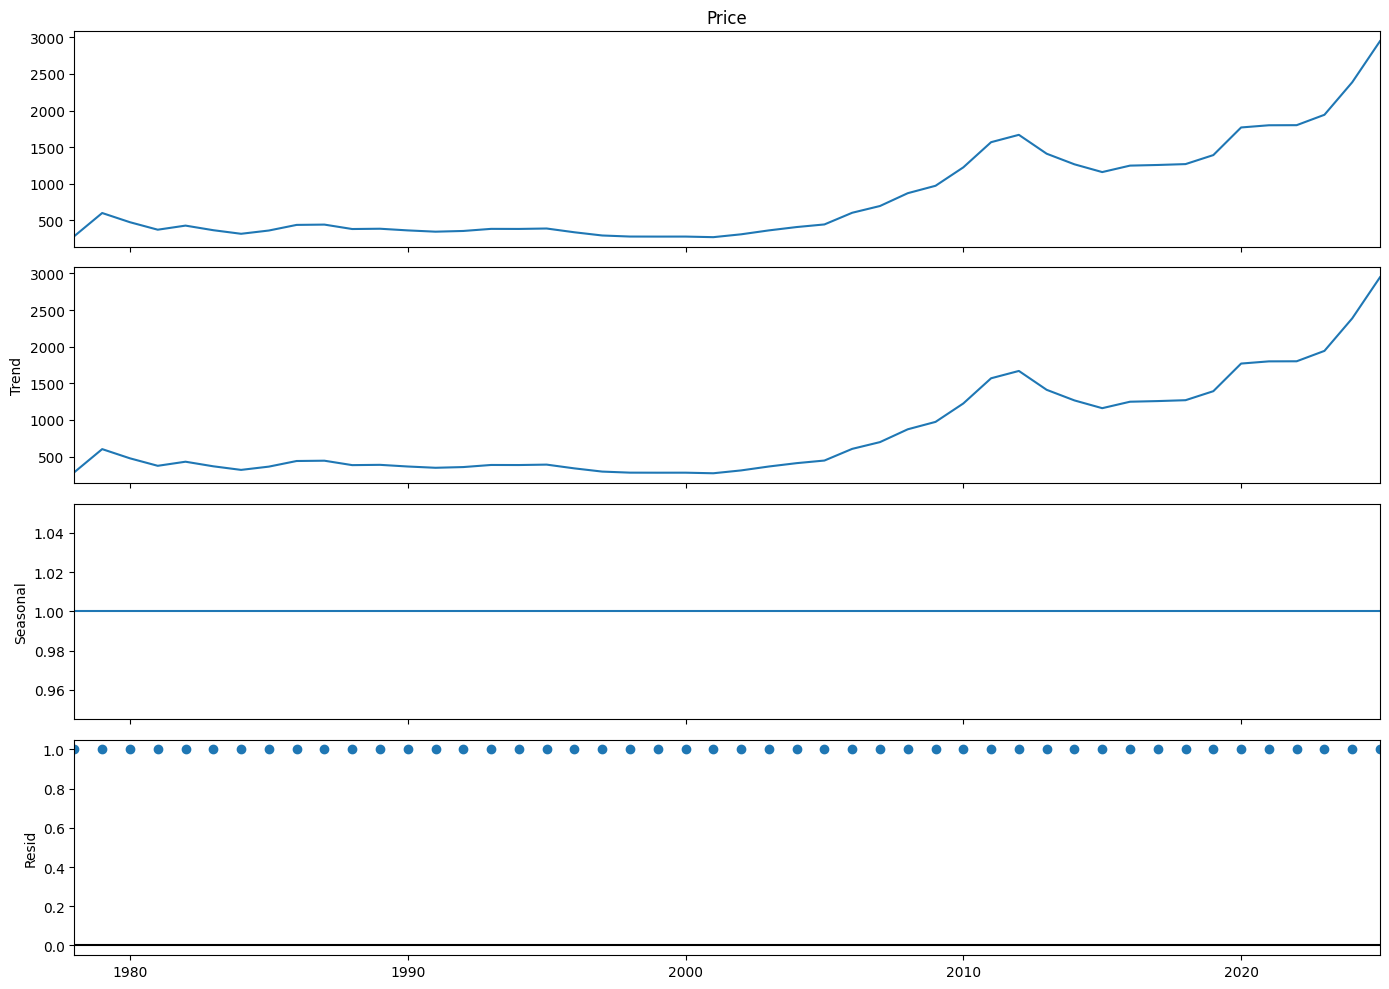

In [16]:
import statsmodels.api as sm

yearly_avg.set_index('Year', inplace=True)
decomposition = sm.tsa.seasonal_decompose(yearly_avg['Price'], model='multiplicative', period=1)

# Plotting the decomposition
fig = decomposition.plot()
fig.set_size_inches(14, 10)

# Show the plot
plt.tight_layout()
plt.show()

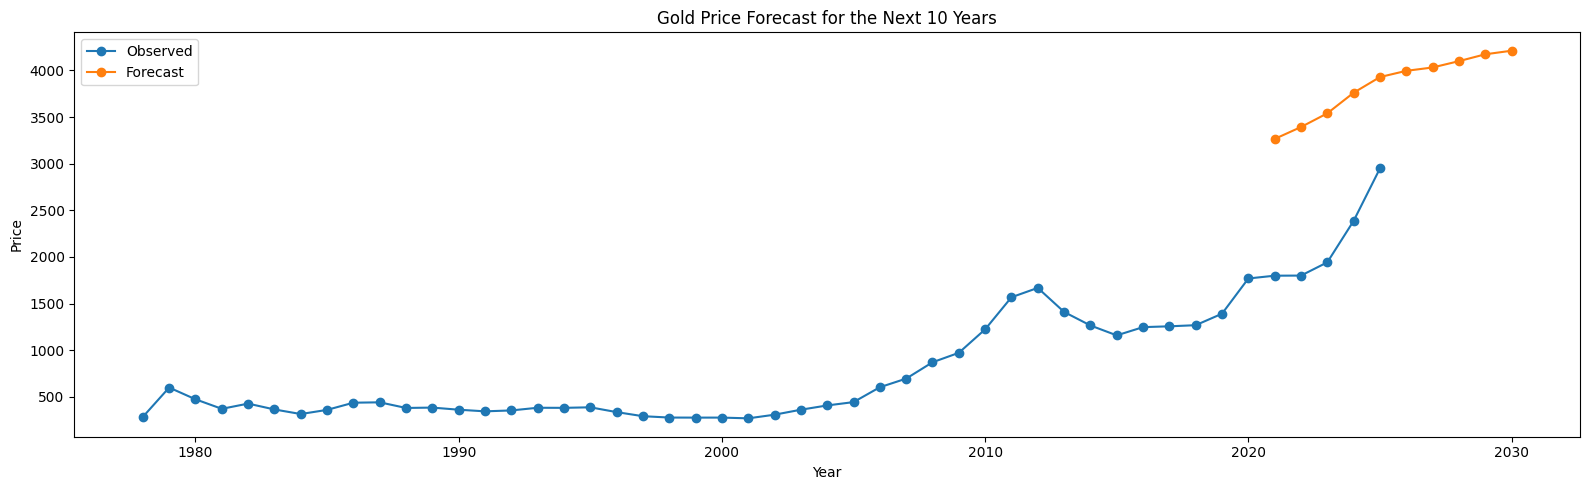

48    3265.070994
49    3392.576630
50    3539.508724
51    3760.039503
52    3928.082069
53    3994.715714
54    4030.741268
55    4098.460041
56    4172.063483
57    4210.335461
Name: predicted_mean, dtype: float64

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

# Fit the ARIMA model
model = ARIMA(yearly_avg['Price'], order=(5, 1, 0))
model_fit = model.fit()

# Make predictions for the next 10 years (2021-2030)
forecast = model_fit.forecast(steps=10)
forecast_years = list(range(2025, 2035))

# Plot the results
plt.figure(figsize=(16, 5))
plt.plot(yearly_avg.index, yearly_avg['Price'], label='Observed', marker='o')
plt.plot(forecast_years, forecast, label='Forecast', marker='o')

# Add title and labels
plt.title('Gold Price Forecast for the Next 10 Years')
plt.xlabel('Year')
plt.ylabel('Price')

# Add Legend
plt.legend()

# Enable Grid View
plt.grid(False)

# Show the plot
plt.tight_layout()
plt.show()

forecast


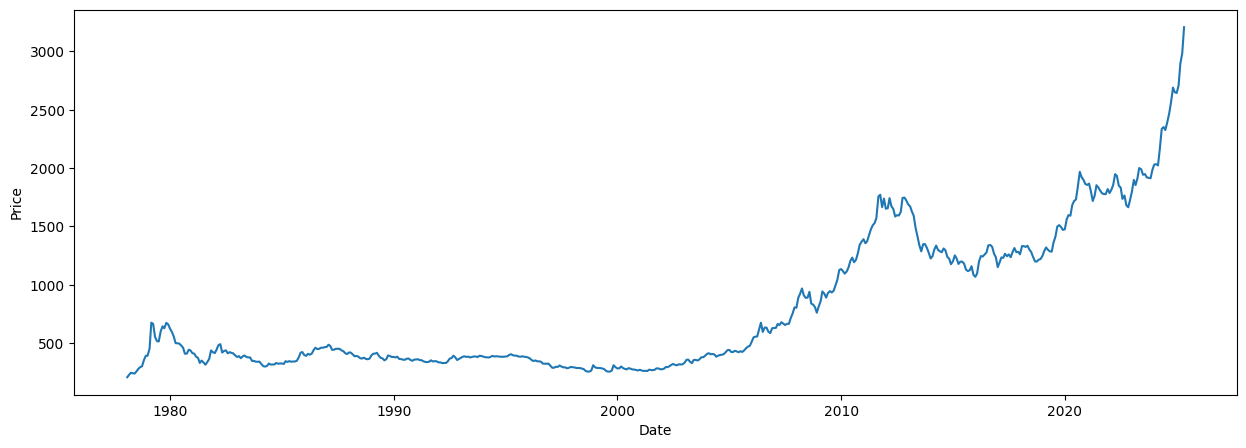

In [19]:
sheet_name = 'Monthly-Avg-USD'
data = excel_file.parse(sheet_name)
data.head()

data['Date'] = pd.to_datetime(data['Date'],format = "%m/%d/%Y")
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['Day'] = data['Date'].dt.day
data.tail()

plt.subplots(figsize = (15,5))
sns.lineplot(data,x = data['Date'], y = data['Price'])
plt.show()

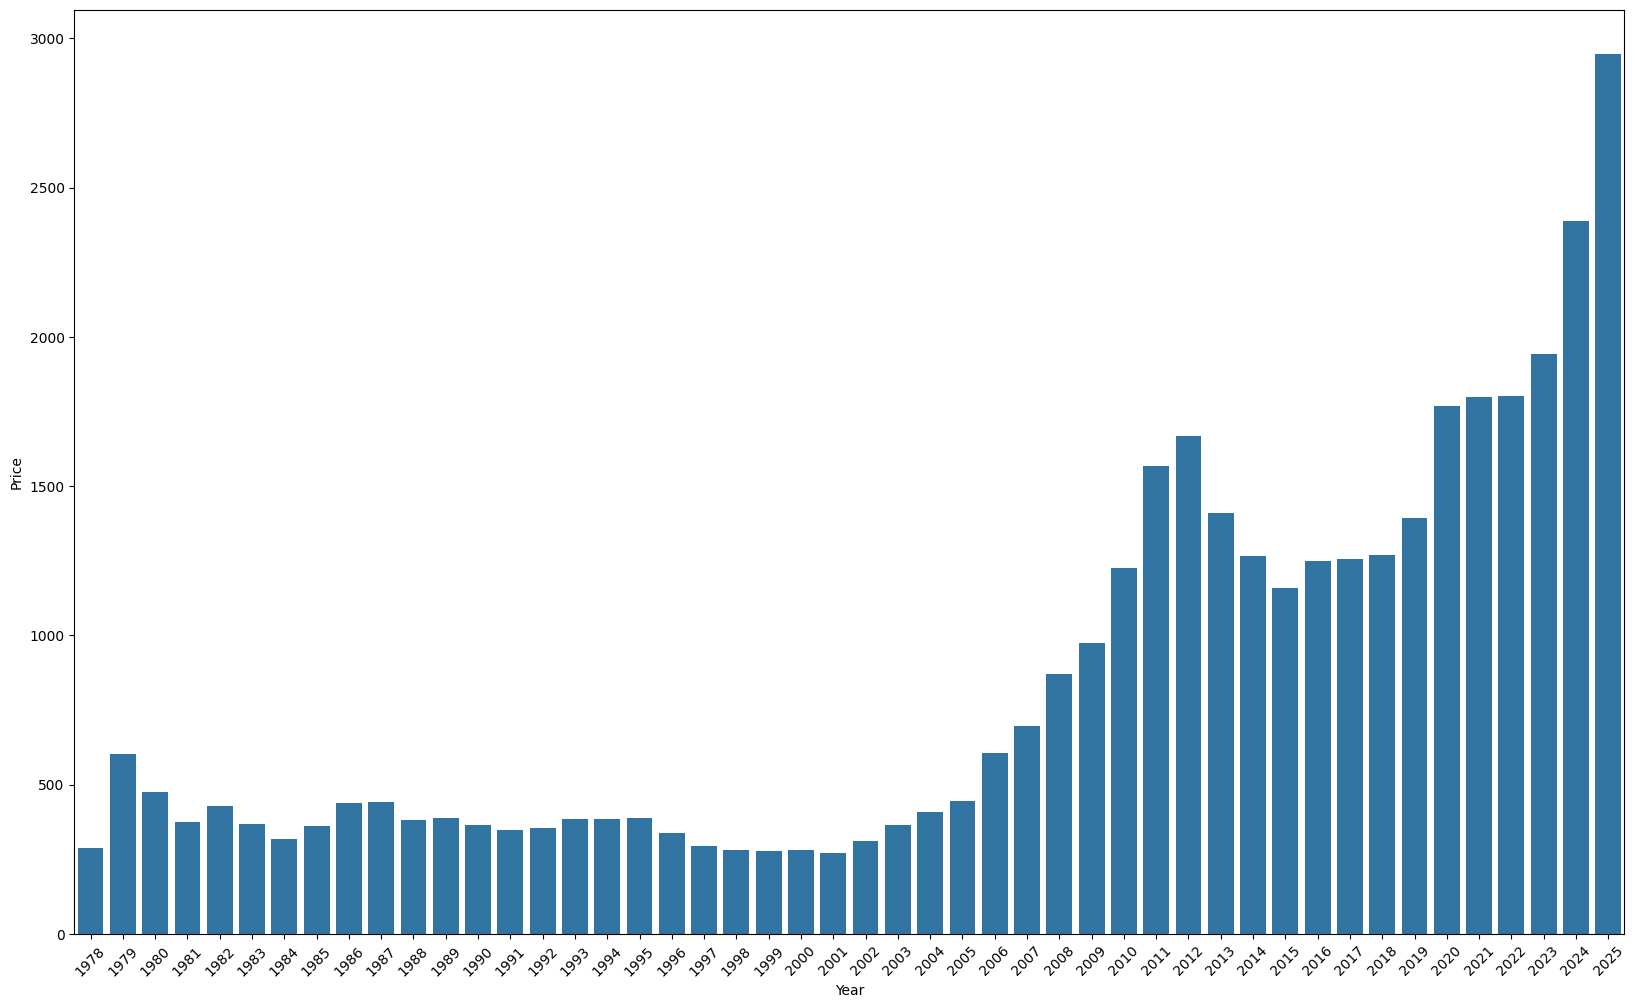

In [20]:
plt.subplots(figsize = (20,12))
sns.barplot(data,x = data['Year'], y = data['Price'],ci=None)
plt.xticks(rotation = 45)
plt.show()

In [21]:
data15 = data[(data['Year']>2010)]
data_predict = data15[['Date','Year','Month','Day','Price']]
data_predict.shape

(172, 5)

In [22]:
data_predict.head()

Date  Year  Month  Day    Price
396 2011-01-31  2011      1   31  1356.40
397 2011-02-28  2011      2   28  1372.73
398 2011-03-31  2011      3   31  1424.01
399 2011-04-29  2011      4   29  1473.81
400 2011-05-31  2011      5   31  1510.44

In [23]:
years = list(data_predict['Year'].value_counts().index.sort_values())
years

[2011,
 2012,
 2013,
 2014,
 2015,
 2016,
 2017,
 2018,
 2019,
 2020,
 2021,
 2022,
 2023,
 2024,
 2025]

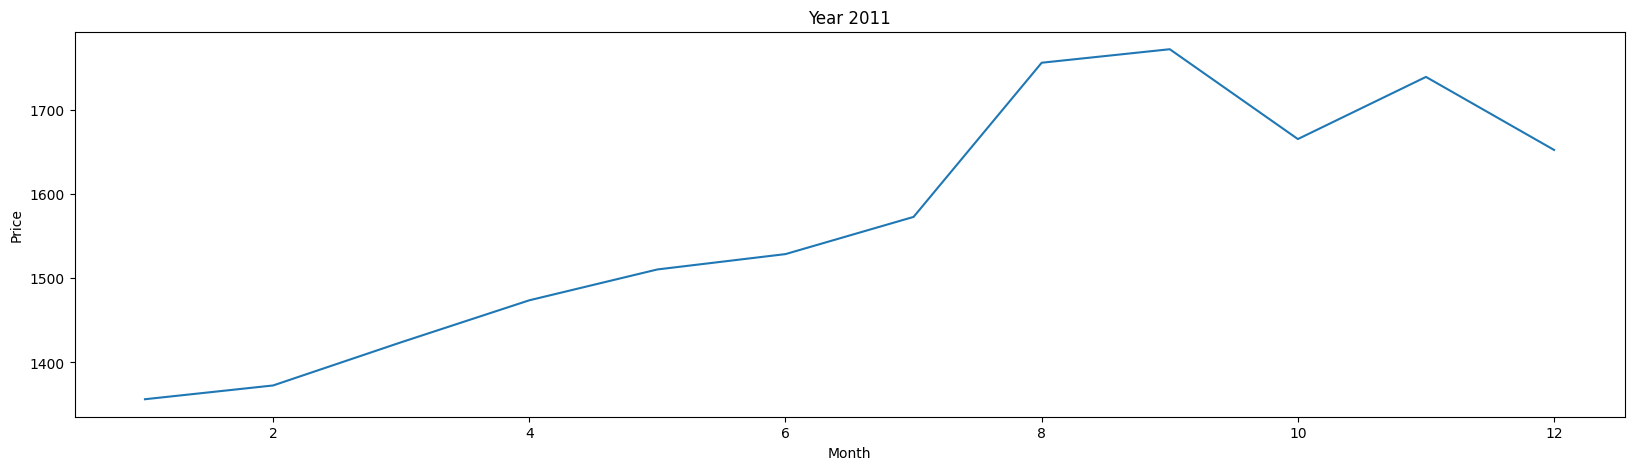

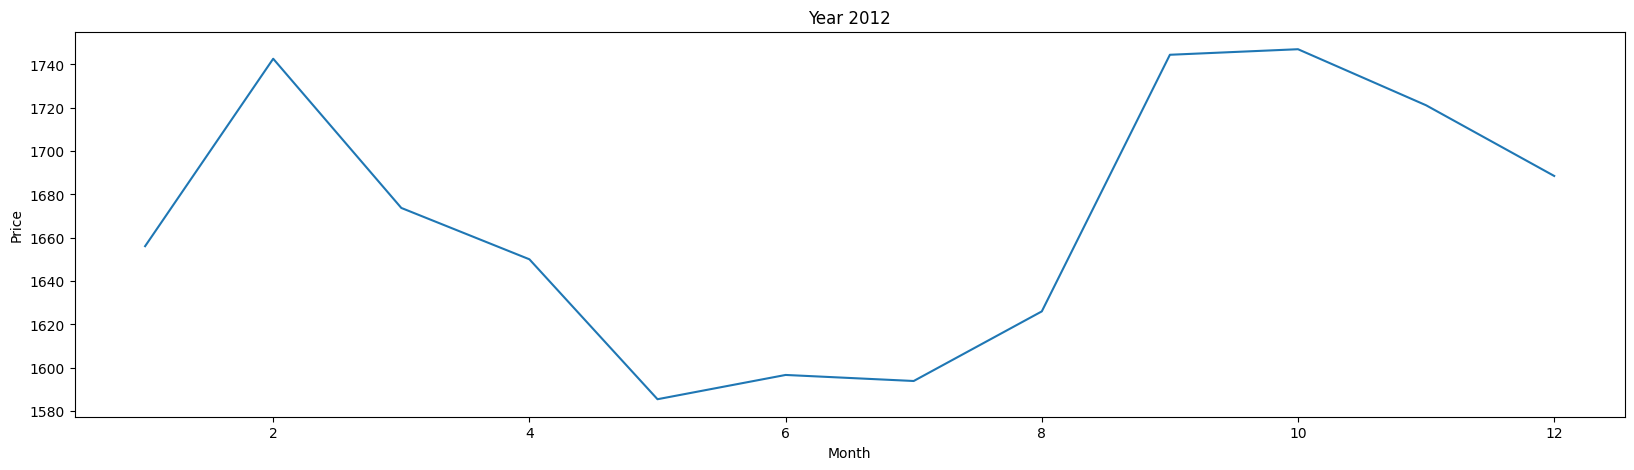

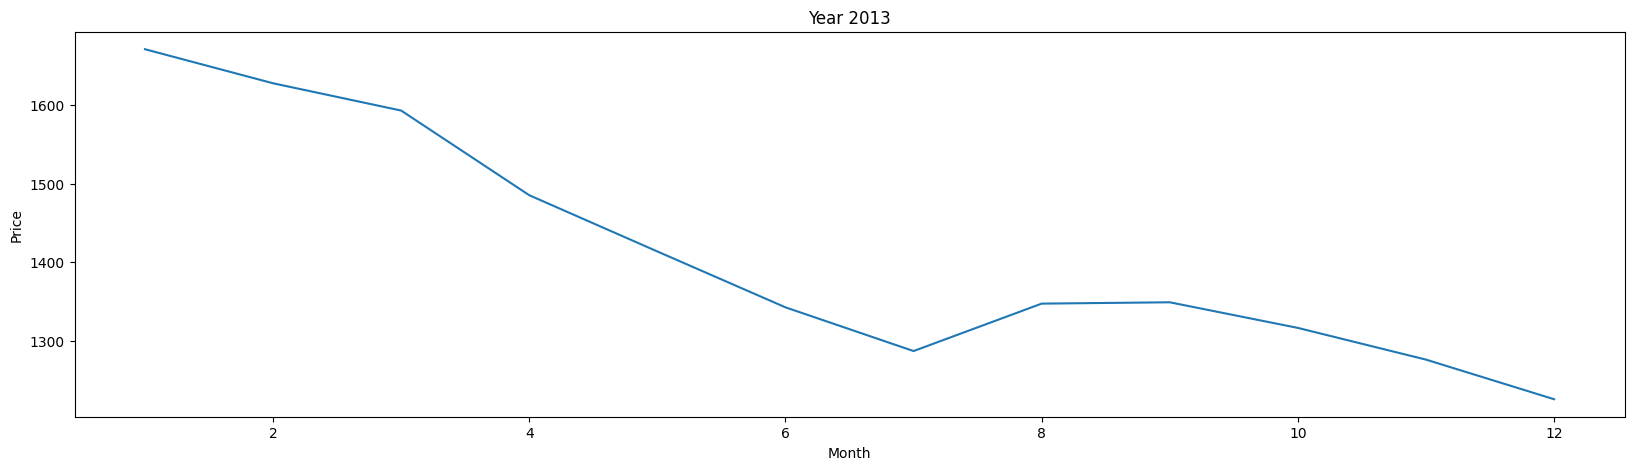

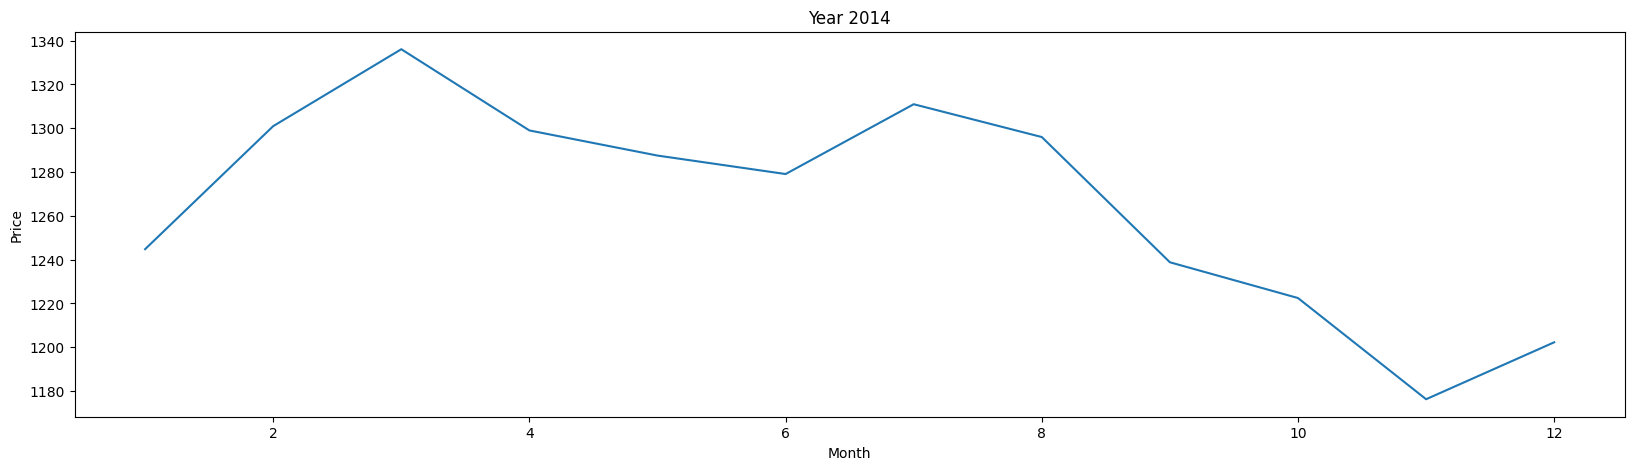

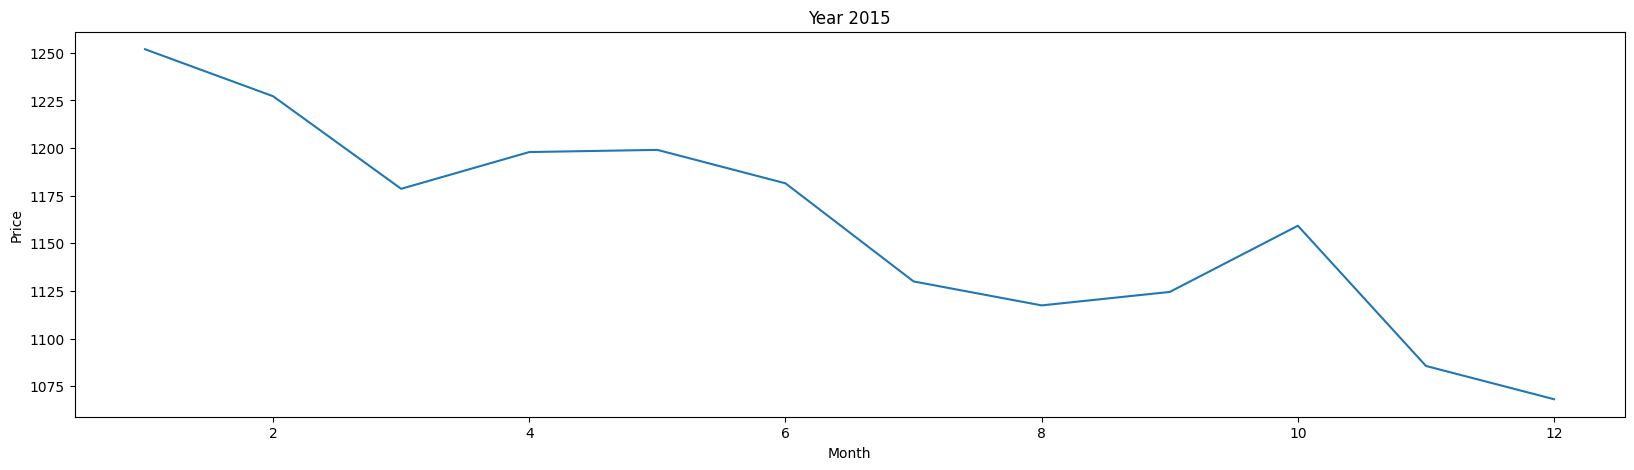

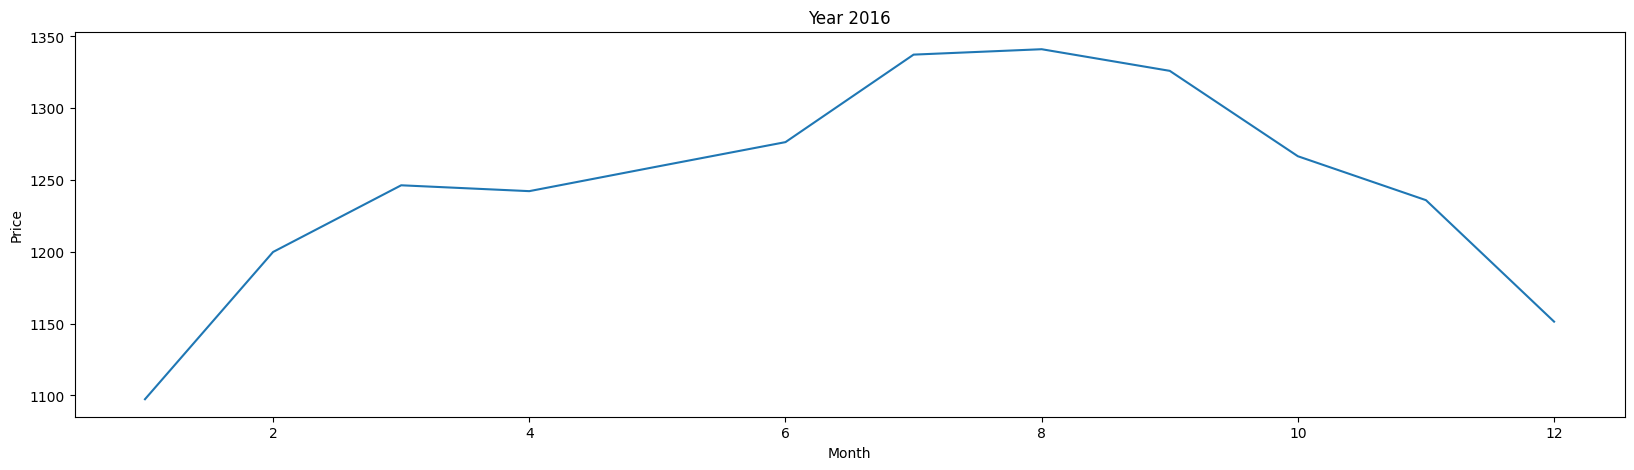

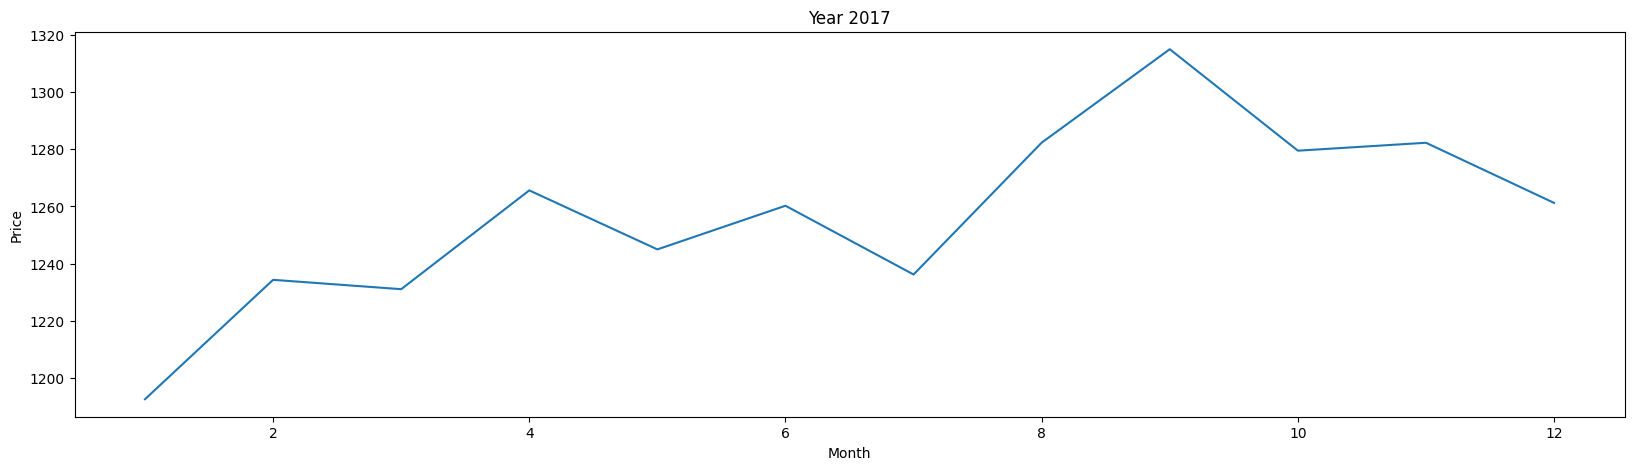

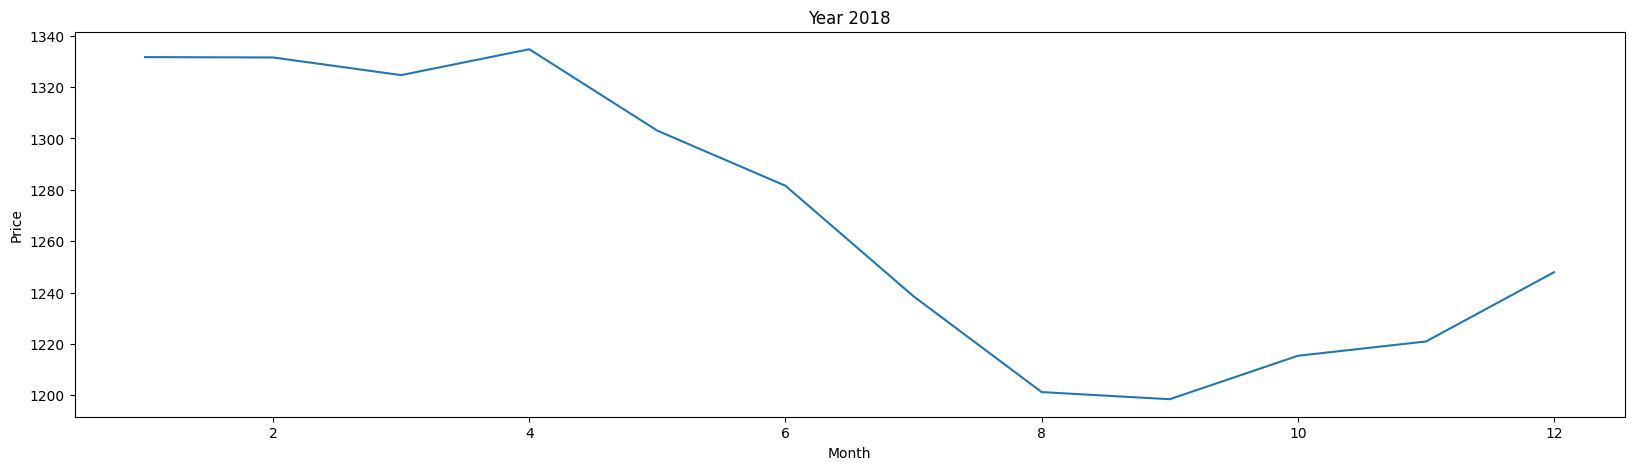

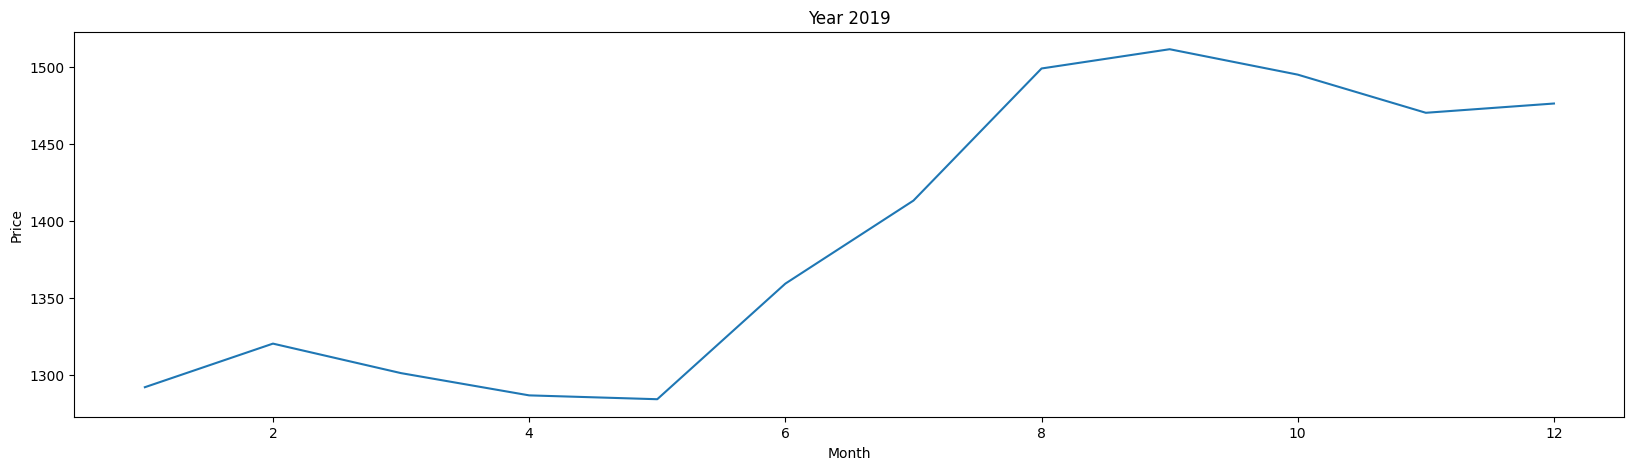

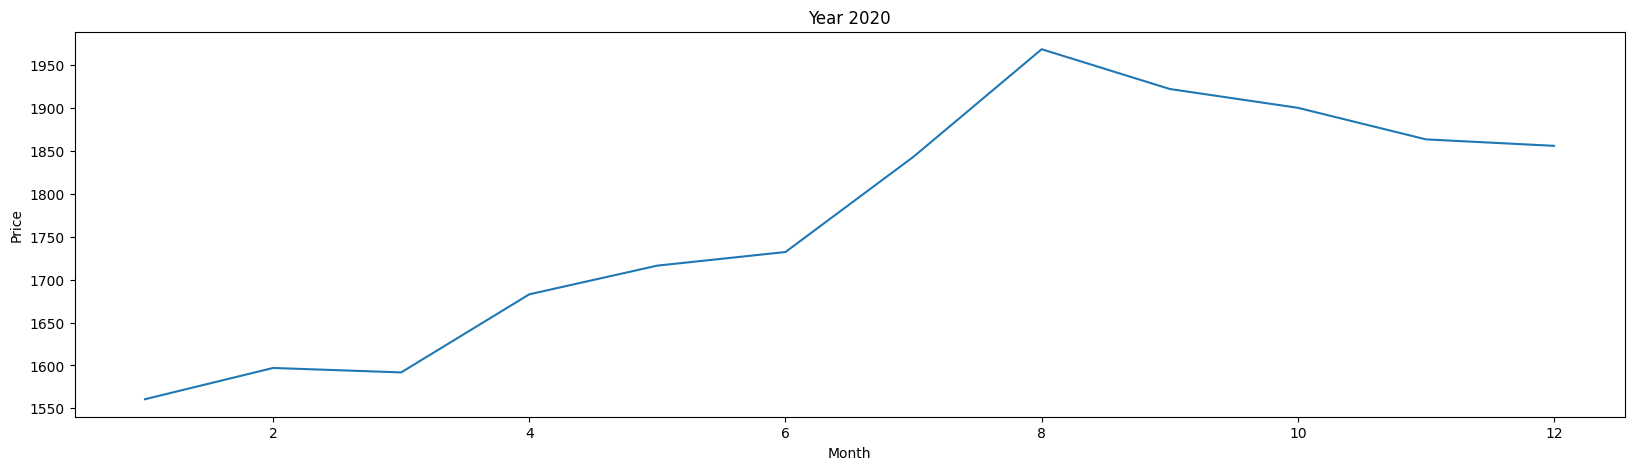

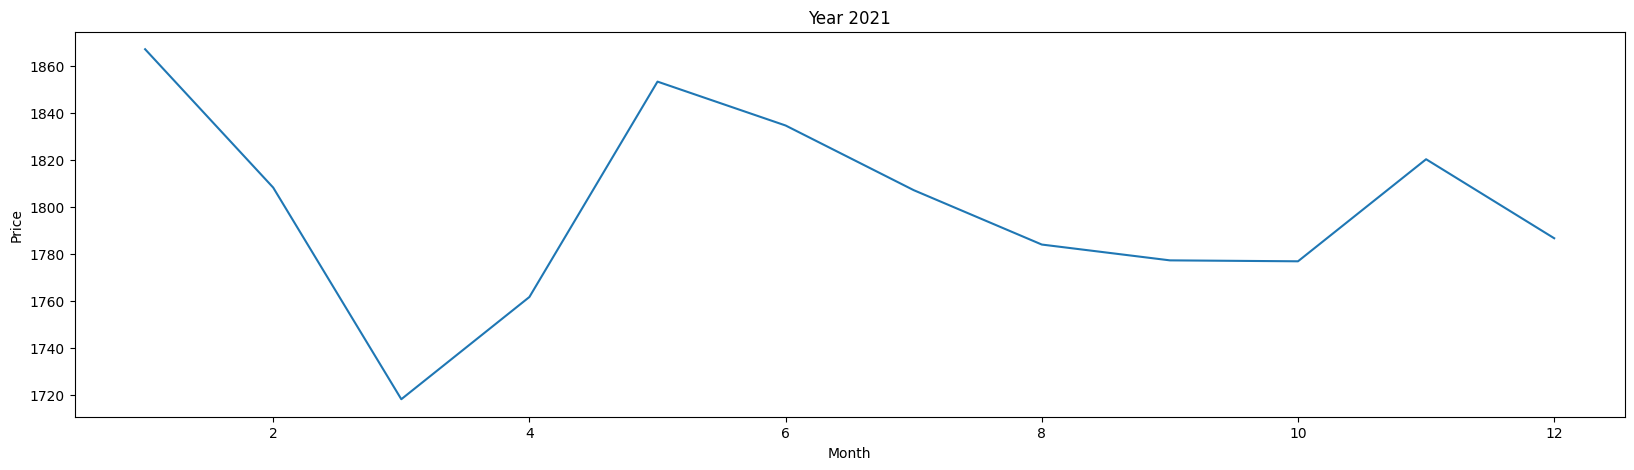

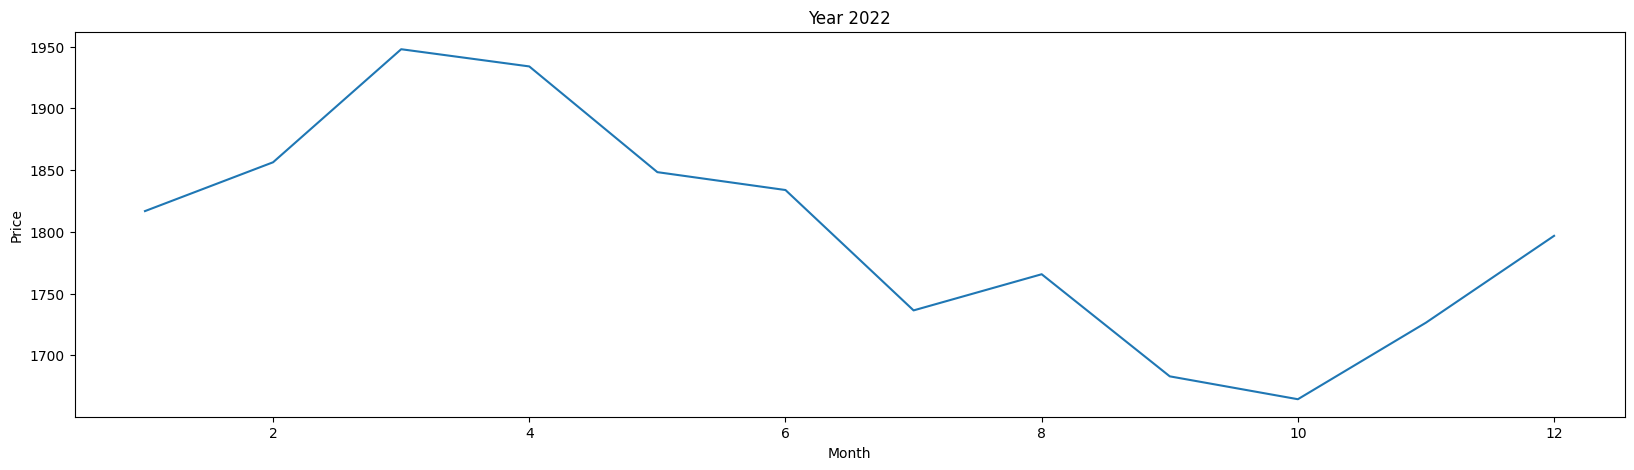

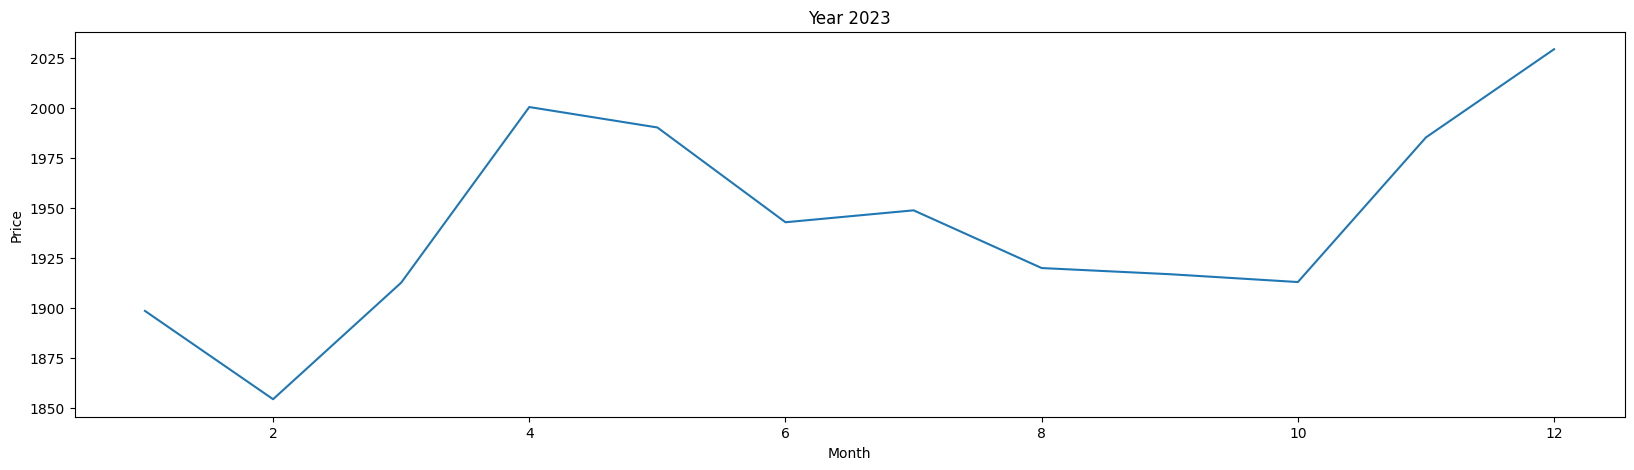

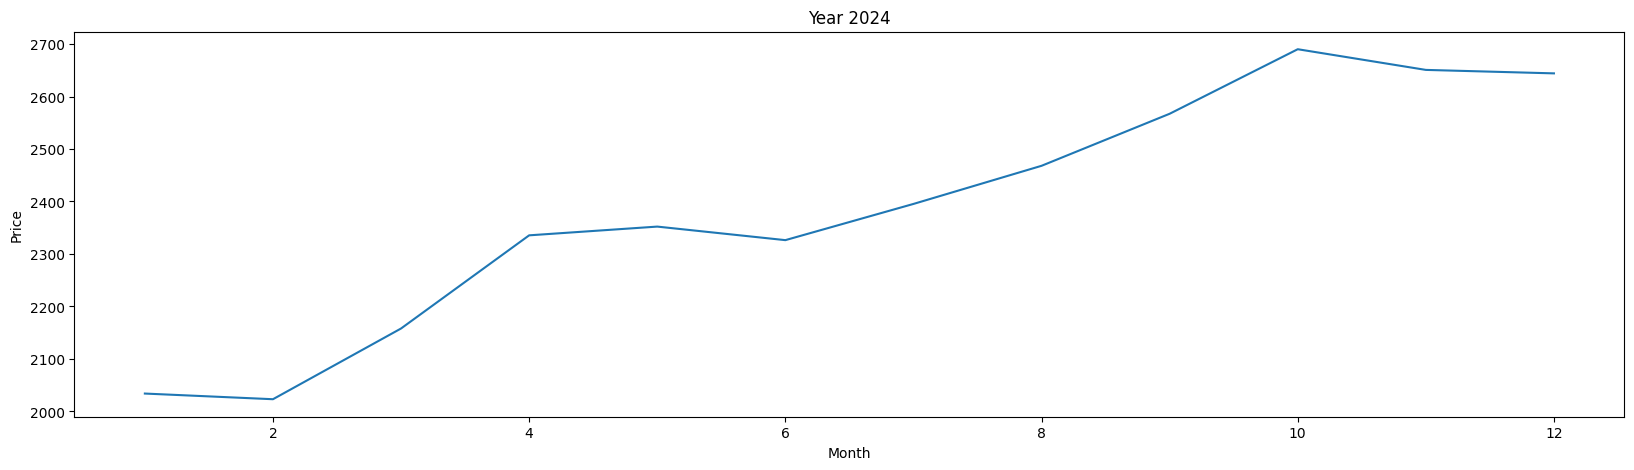

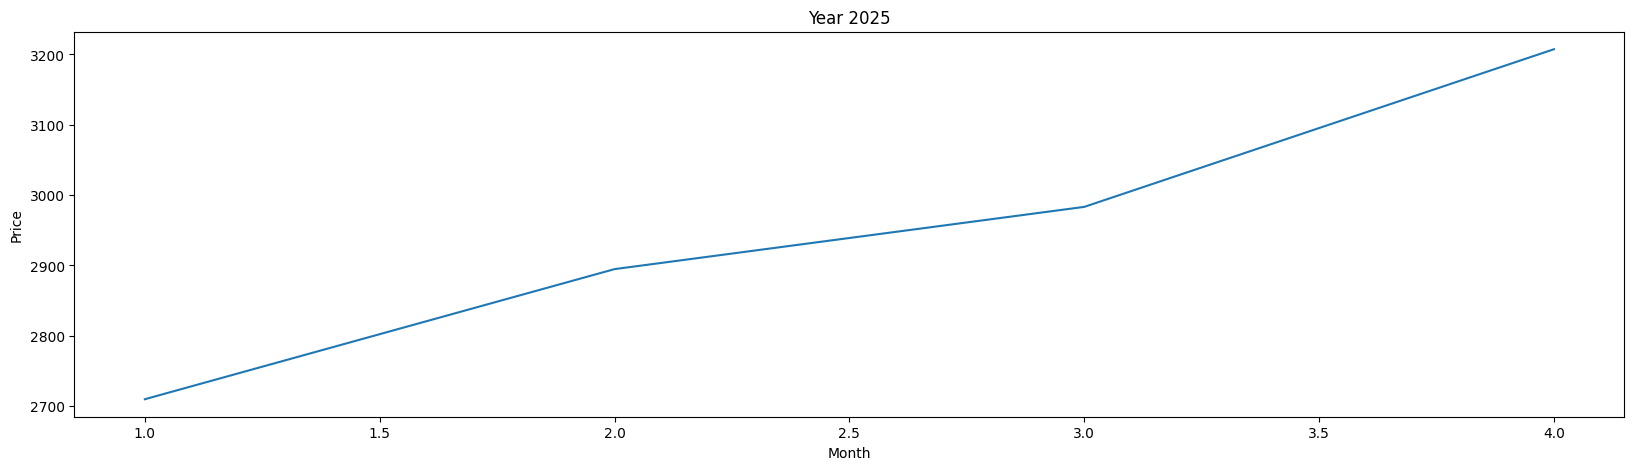

In [24]:
def Yearly_data(year):
    grp = data_predict[(data_predict.Year == year)]
    plt.subplots(figsize = (20,5))
    sns.lineplot(grp,x = grp.Month, y = grp['Price'])
    plt.title(f'Year {year}')
    plt.show()


for i in range(len(years)):
    Yearly_data(years[i])

In [25]:
#ARIMA
data_predict.set_index(data_predict['Date'],inplace = True)
data_predict = data_predict.drop(columns = 'Date')
data_predict.tail()

Year  Month  Day    Price
Date                                 
2024-12-31  2024     12   31  2644.07
2025-01-31  2025      1   31  2709.69
2025-02-28  2025      2   28  2894.73
2025-03-31  2025      3   31  2983.25
2025-04-30  2025      4   30  3207.48

In [26]:
def check_stationarity(series):
    from statsmodels.tsa.stattools import adfuller
    result = adfuller(series)
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))
    if (result[1] <= 0.05) & (result[4]['5%'] > result[0]):
        print("\u001b[32mStationary\u001b[0m")
    else:
        print("\x1b[31mNon-stationary\x1b[0m")  



from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

check_stationarity(data_predict['Price'])

ADF Statistic: 2.386637
p-value: 0.999004
Critical Values:
	1%: -3.469
	5%: -2.879
	10%: -2.576
Non-stationary


In [27]:
data_predict['Price_diff'] = data_predict['Price'].diff().fillna(0)

check_stationarity(data_predict['Price_diff'])

ADF Statistic: -8.987872
p-value: 0.000000
Critical Values:
	1%: -3.469
	5%: -2.879
	10%: -2.576
Stationary


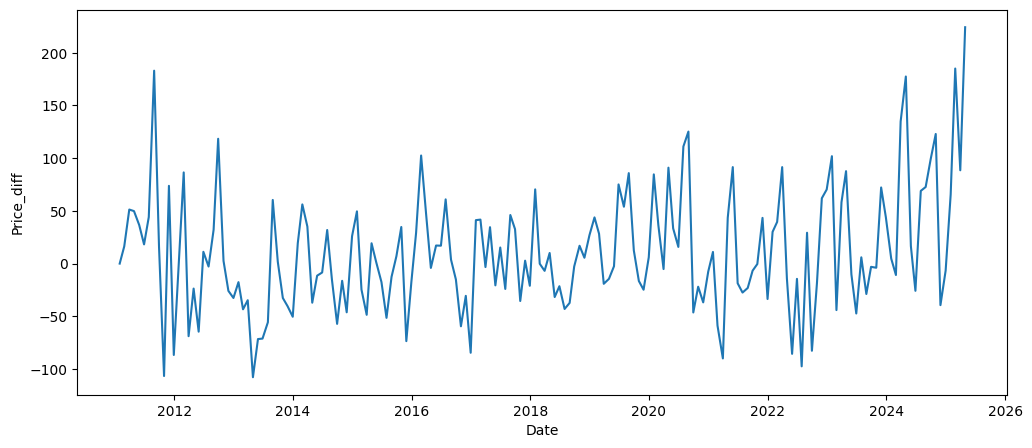

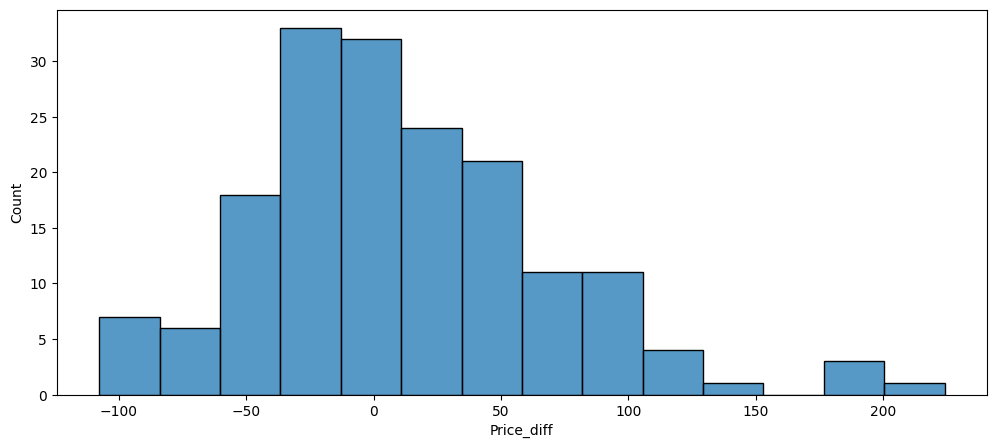

In [28]:
f, ax = plt.subplots(nrows=1, ncols=1, figsize=(12,5))

sns.lineplot(data=data_predict, x=data_predict.index, y='Price_diff')
plt.show()

f, ax = plt.subplots(nrows=1, ncols=1, figsize=(12,5))

sns.histplot(data_predict['Price_diff'] )
plt.show()

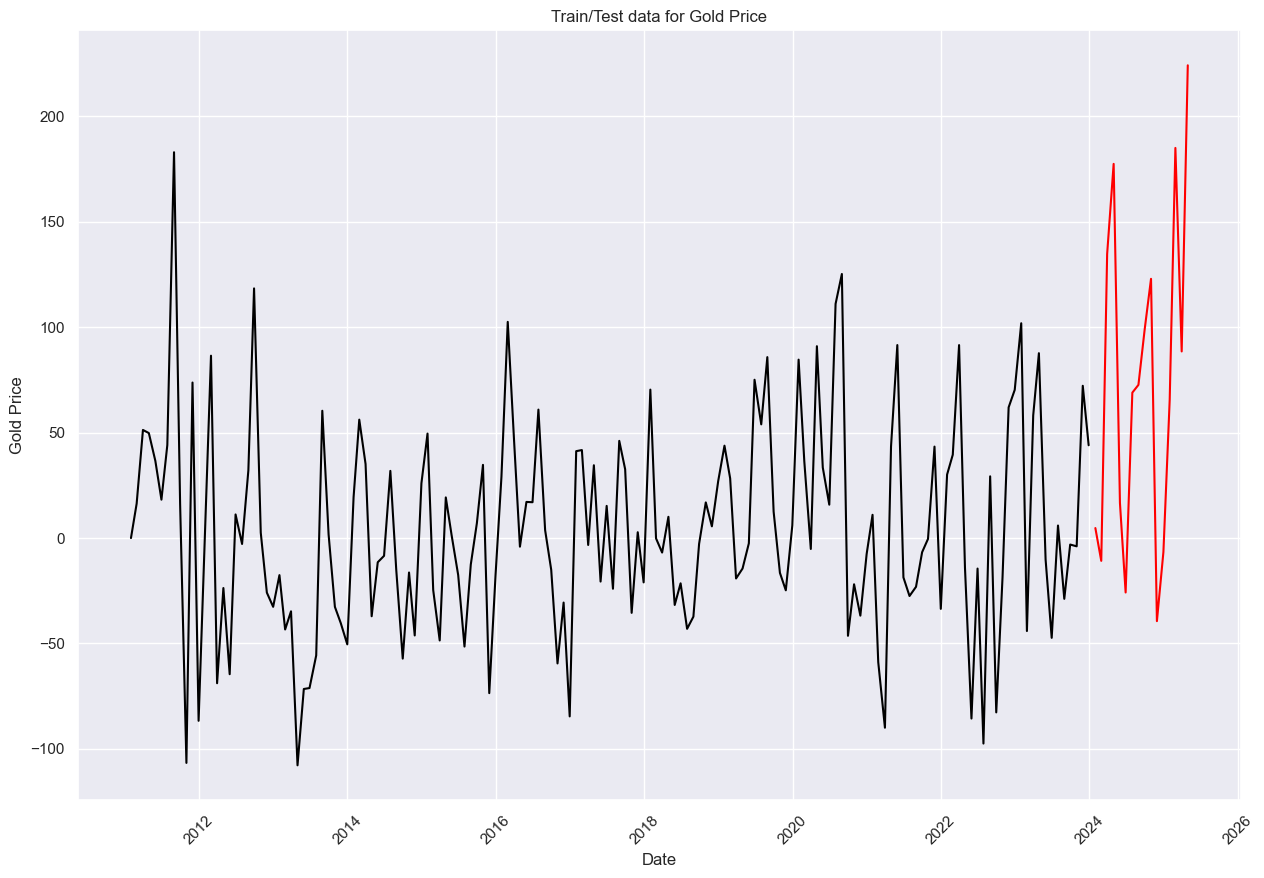

In [29]:
train = data_predict[data_predict.index<pd.to_datetime("2024-01-01",format = "%Y-%m-%d")]
test = data_predict[data_predict.index>pd.to_datetime("2024-01-01",format = "%Y-%m-%d")]
train = train[['Price_diff']]
test = test[['Price_diff']]
sns.set()
plt.subplots(figsize = (15,10))
plt.plot(train,color ='black')
plt.plot(test,color = 'red')
plt.ylabel("Gold Price")
plt.xlabel("Date")
plt.xticks(rotation = 45)
plt.title("Train/Test data for Gold Price")
plt.show()

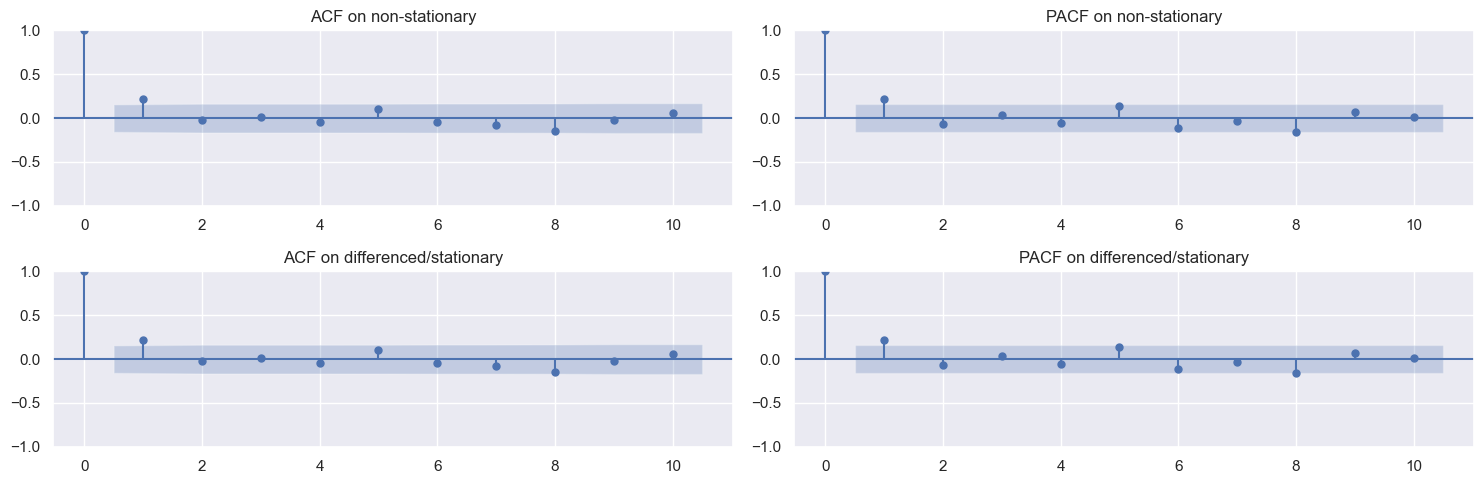

In [30]:
#ACF & PACF
f, ax = plt.subplots(nrows=2, ncols=2, figsize=(15,5))

plot_acf(train['Price_diff'], lags=10, ax=ax[0, 0], title='ACF on non-stationary')
plot_pacf(train['Price_diff'], lags=10, ax=ax[0, 1], method='ols', title='PACF on non-stationary')

plot_acf(train['Price_diff'], lags=10, ax=ax[1, 0], title='ACF on differenced/stationary')
plot_pacf(train['Price_diff'], lags=10, ax=ax[1, 1], method='ols', title='PACF on differenced/stationary')

plt.tight_layout()
plt.show()

In [31]:
def check_order(p,d,q):
    y = train['Price_diff']
    from statsmodels.tsa.arima.model import ARIMA
    ARIMAmodel = ARIMA(y, order = (p,d,q))
    ARIMAmodel = ARIMAmodel.fit()
    print(ARIMAmodel.summary(),"\n")
    
    y_pred = ARIMAmodel.get_forecast(len(test.index))
    y_pred_df = y_pred.conf_int(alpha = 0.05) 
    y_pred_df["Predictions"] = ARIMAmodel.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])
    y_pred_df.index = test.index
    y_pred_out = y_pred_df["Predictions"] 
    
    
    from sklearn.metrics import mean_squared_error
    arima_rmse = np.sqrt(mean_squared_error(test['Price_diff'].values, y_pred_df["Predictions"]))
    print("RMSE: ",arima_rmse,'\n')
       
    ARIMAmodel.plot_diagnostics(figsize = (20,12))
    
     
    sns.set()
    plt.subplots(figsize = (15,5))
    plt.plot(train,color ='black',label = 'Train')
    plt.plot(test,color = 'red',label = 'Test')
    plt.plot(y_pred_out, color='Yellow', label = 'ARIMA Predictions')
    plt.ylabel("Gold Price")
    plt.xlabel("Date")
    plt.xticks(rotation = 45)
    plt.title("Train/Test and predictions for Gold Price")
    plt.tight_layout()
    plt.show()

                               SARIMAX Results                                
Dep. Variable:             Price_diff   No. Observations:                  156
Model:                          ARIMA   Log Likelihood                -832.077
Date:                Wed, 14 May 2025   AIC                           1668.154
Time:                        21:26:47   BIC                           1674.254
Sample:                    01-31-2011   HQIC                          1670.631
                         - 12-29-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.3134      4.132      1.044      0.297      -3.785      12.412
sigma2      2514.2007    268.331      9.370      0.000    1988.281    3040.120
Ljung-Box (L1) (Q):                   7.22   Jarque-

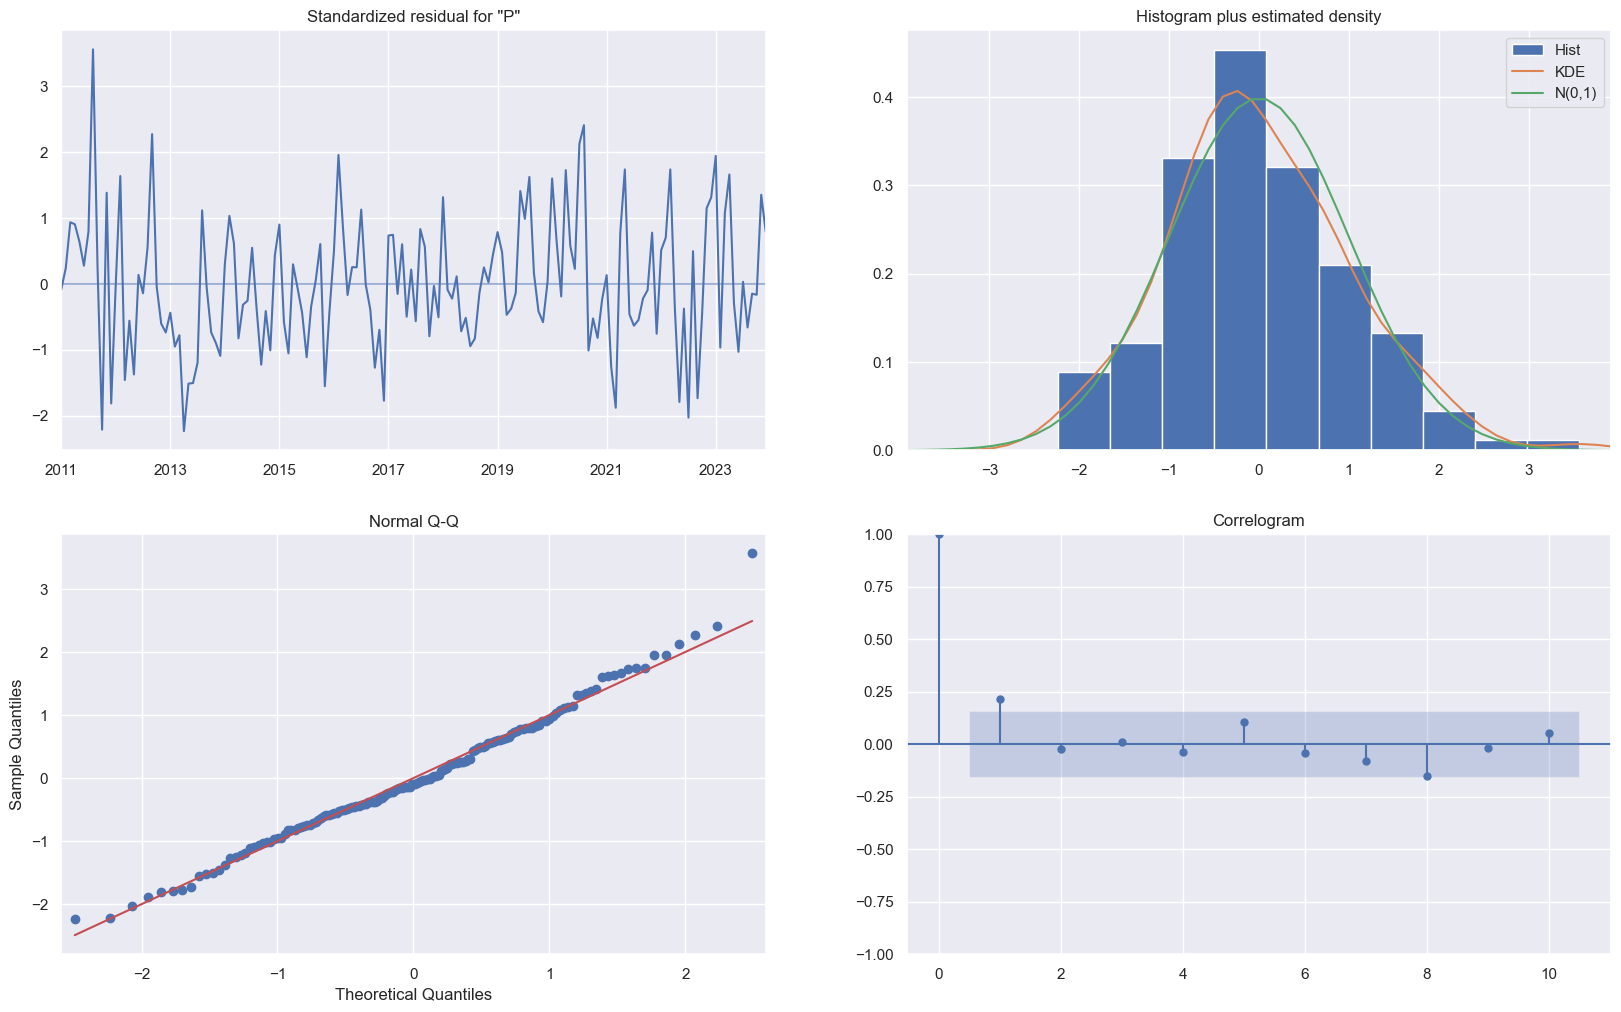

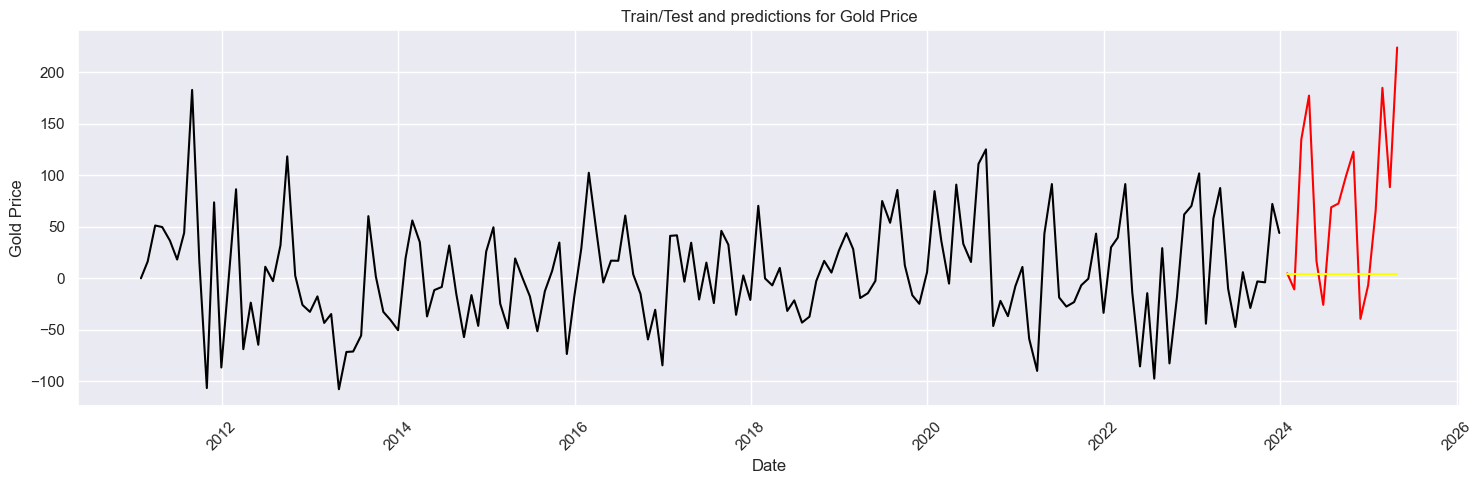

In [32]:
check_order(0,0,0)

                               SARIMAX Results                                
Dep. Variable:             Price_diff   No. Observations:                  156
Model:                          ARIMA   Log Likelihood                -832.077
Date:                Wed, 14 May 2025   AIC                           1668.154
Time:                        21:32:06   BIC                           1674.254
Sample:                    01-31-2011   HQIC                          1670.631
                         - 12-29-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.3134      4.132      1.044      0.297      -3.785      12.412
sigma2      2514.2007    268.331      9.370      0.000    1988.281    3040.120
Ljung-Box (L1) (Q):                   7.22   Jarque-

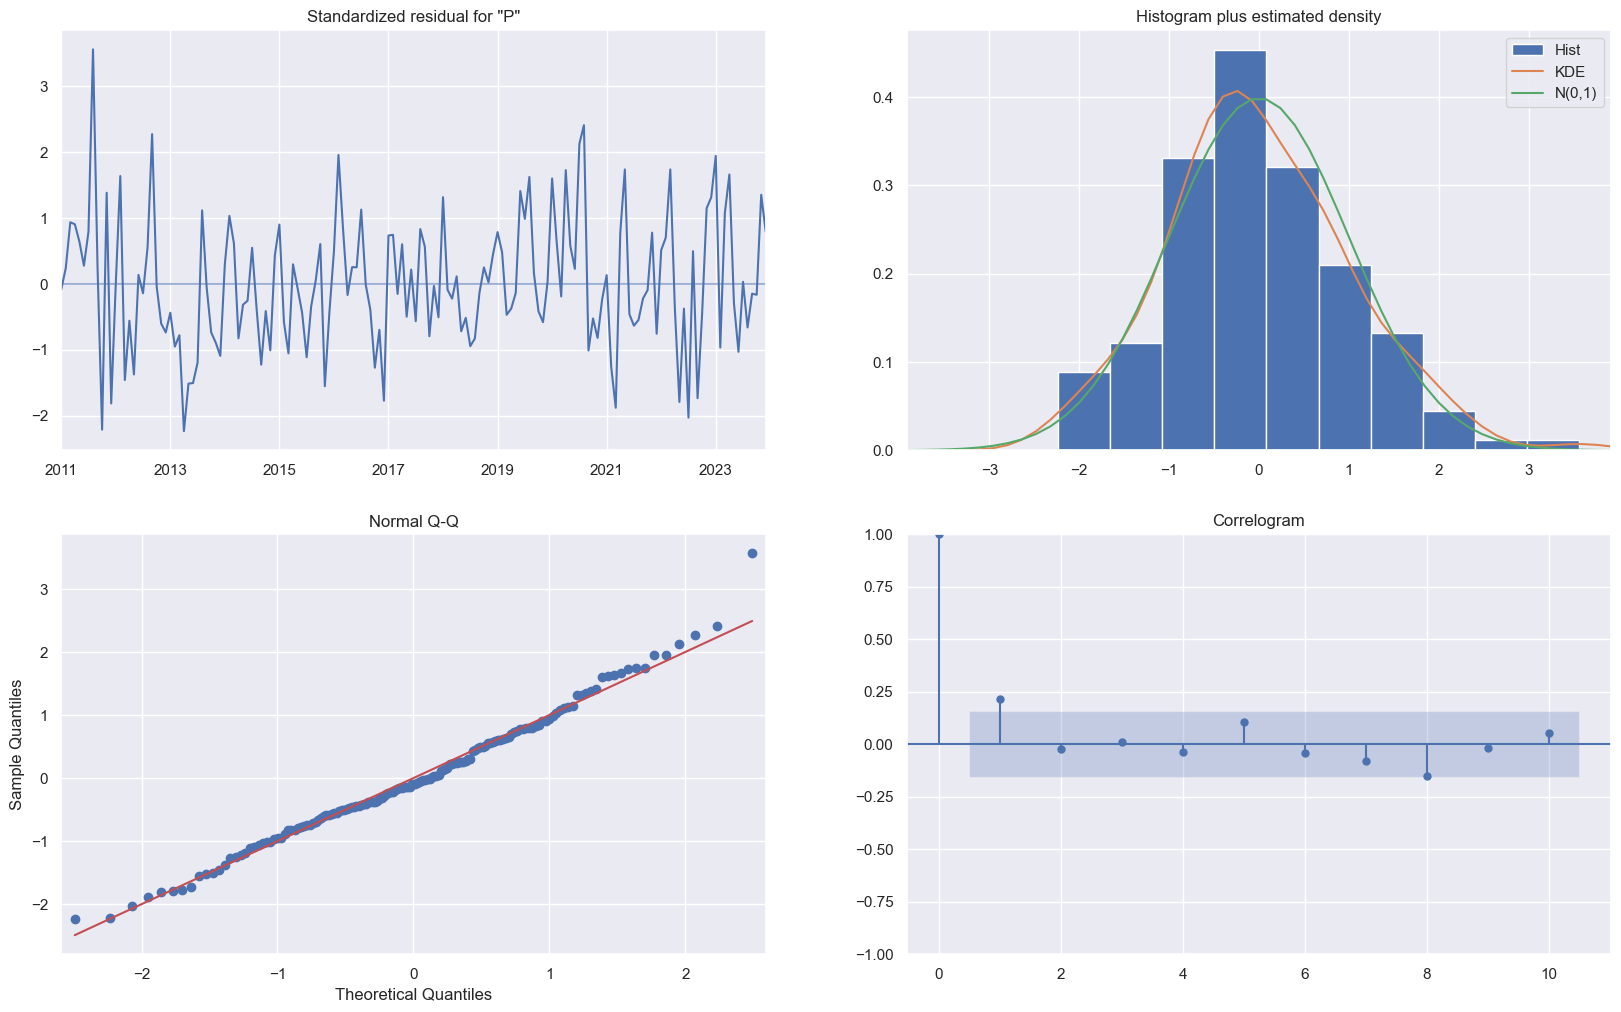

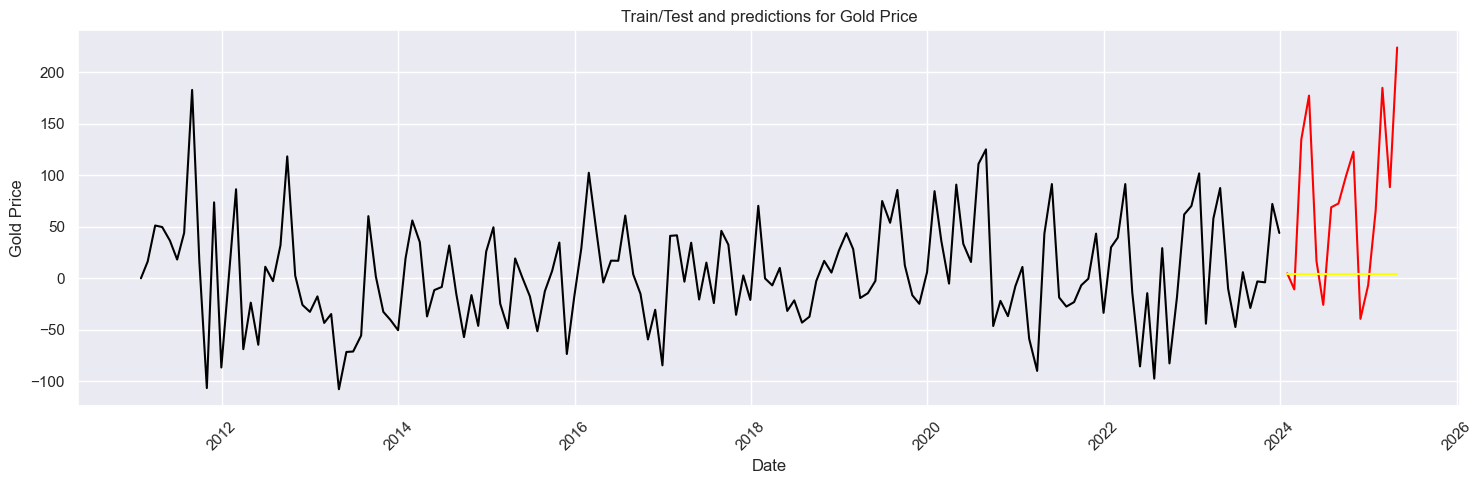

In [33]:
check_order(0,0,0)

                               SARIMAX Results                                
Dep. Variable:             Price_diff   No. Observations:                  156
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -822.034
Date:                Wed, 14 May 2025   AIC                           1654.068
Time:                        21:32:30   BIC                           1669.285
Sample:                    01-31-2011   HQIC                          1660.248
                         - 12-29-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6690      0.091     -7.376      0.000      -0.847      -0.491
ar.L2          0.1152      0.085      1.364      0.173      -0.050       0.281
ma.L1         -0.0416      0.084     -0.493      0.6

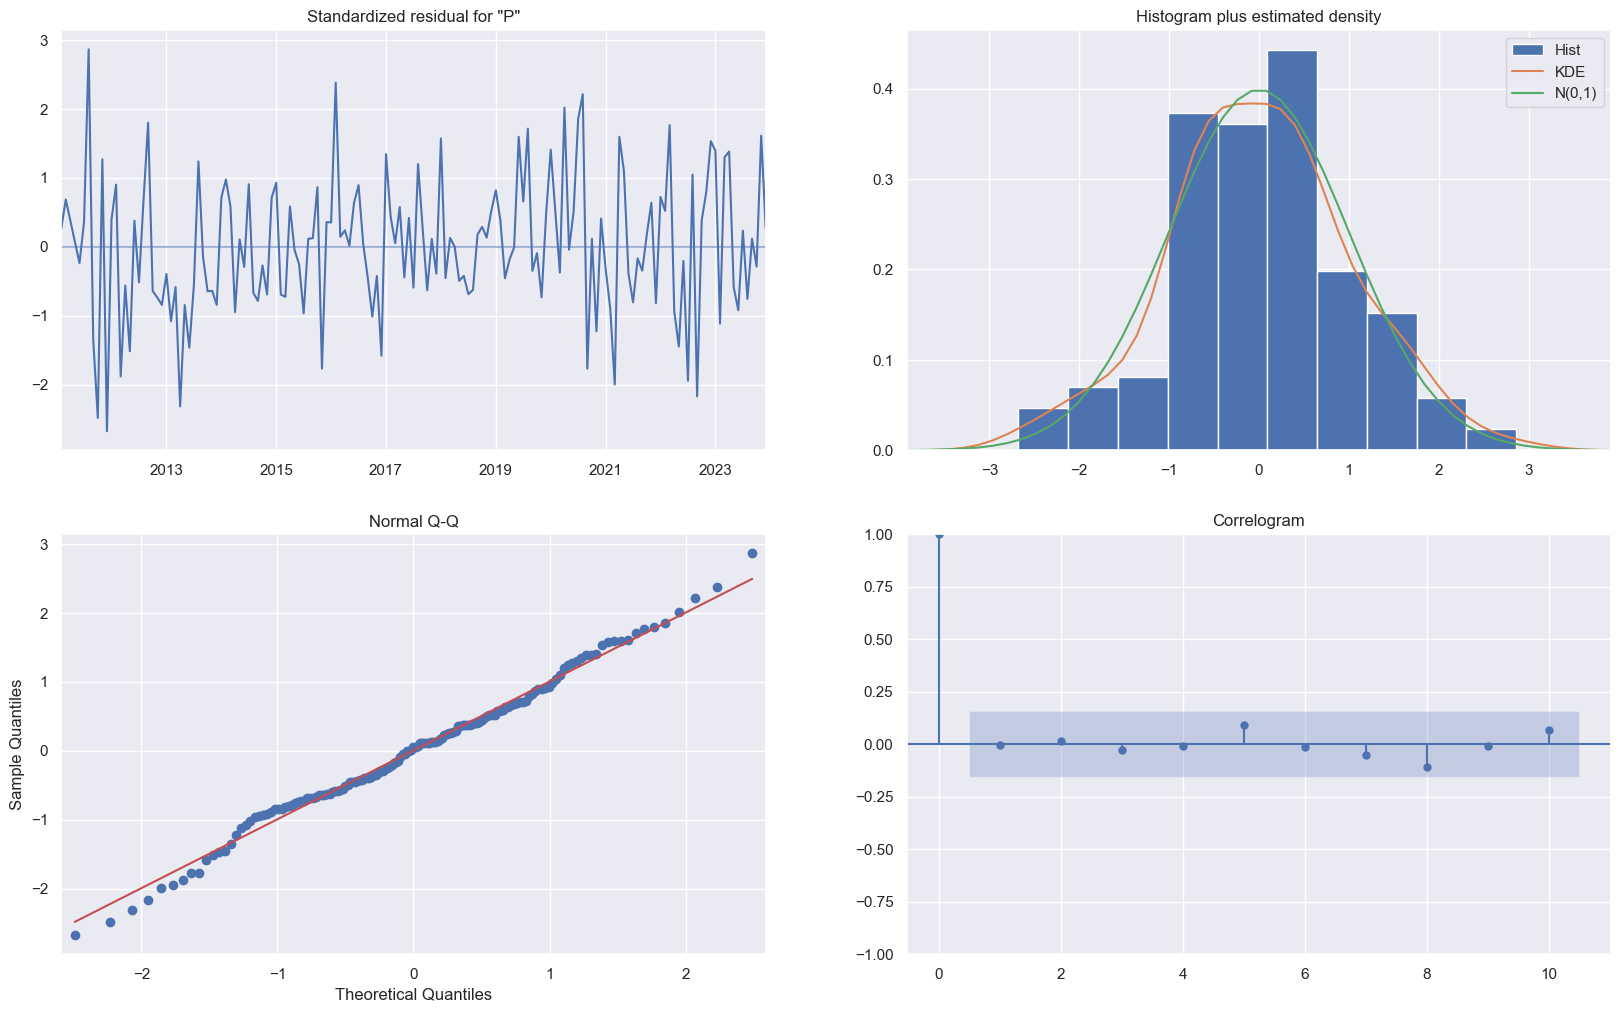

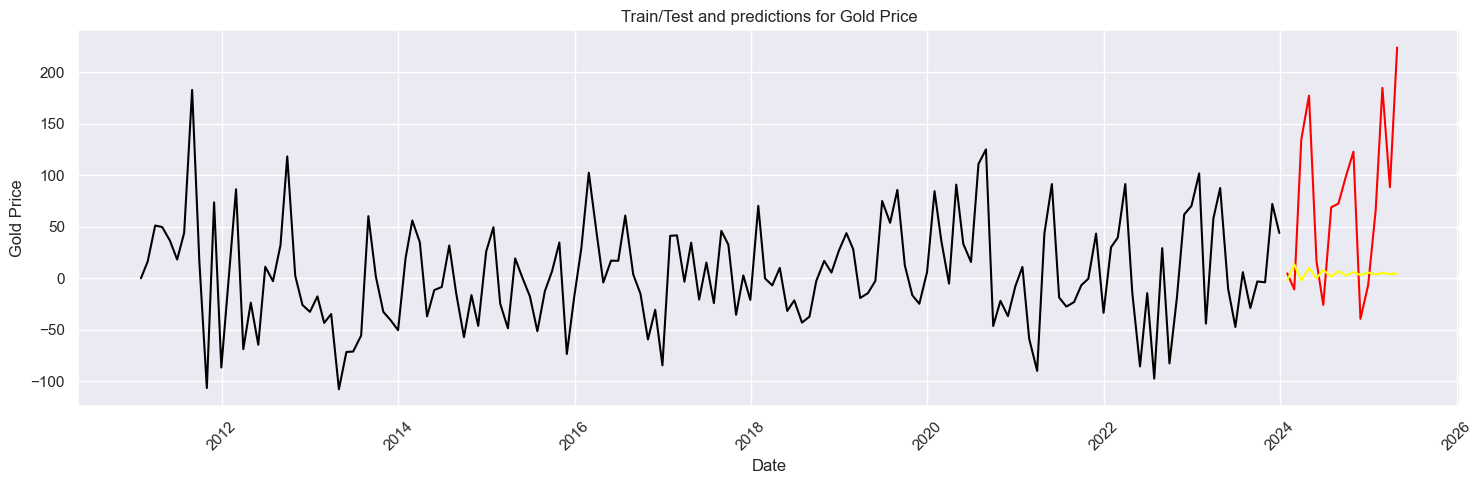

In [34]:
check_order(2,1,2)

                               SARIMAX Results                                
Dep. Variable:             Price_diff   No. Observations:                  156
Model:                 ARIMA(1, 1, 2)   Log Likelihood                -822.895
Date:                Wed, 14 May 2025   AIC                           1653.791
Time:                        21:33:25   BIC                           1665.965
Sample:                    01-31-2011   HQIC                          1658.736
                         - 12-29-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7184      0.087     -8.242      0.000      -0.889      -0.548
ma.L1         -0.0563      0.052     -1.081      0.280      -0.158       0.046
ma.L2         -0.9199      0.057    -16.164      0.0

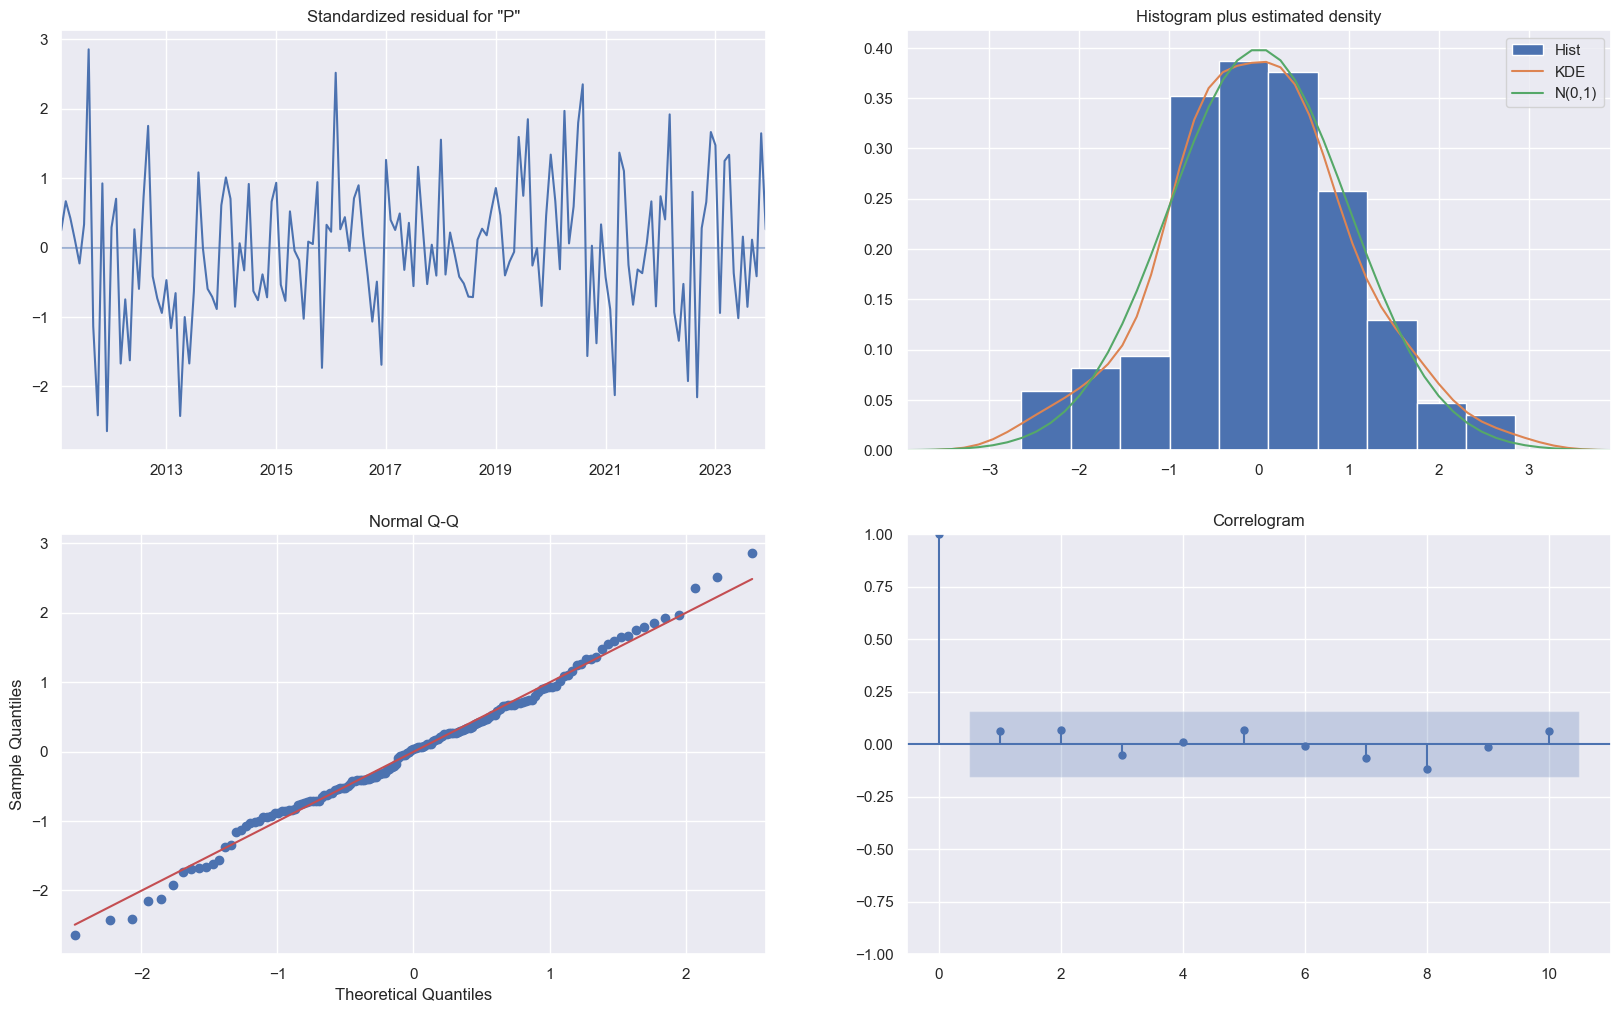

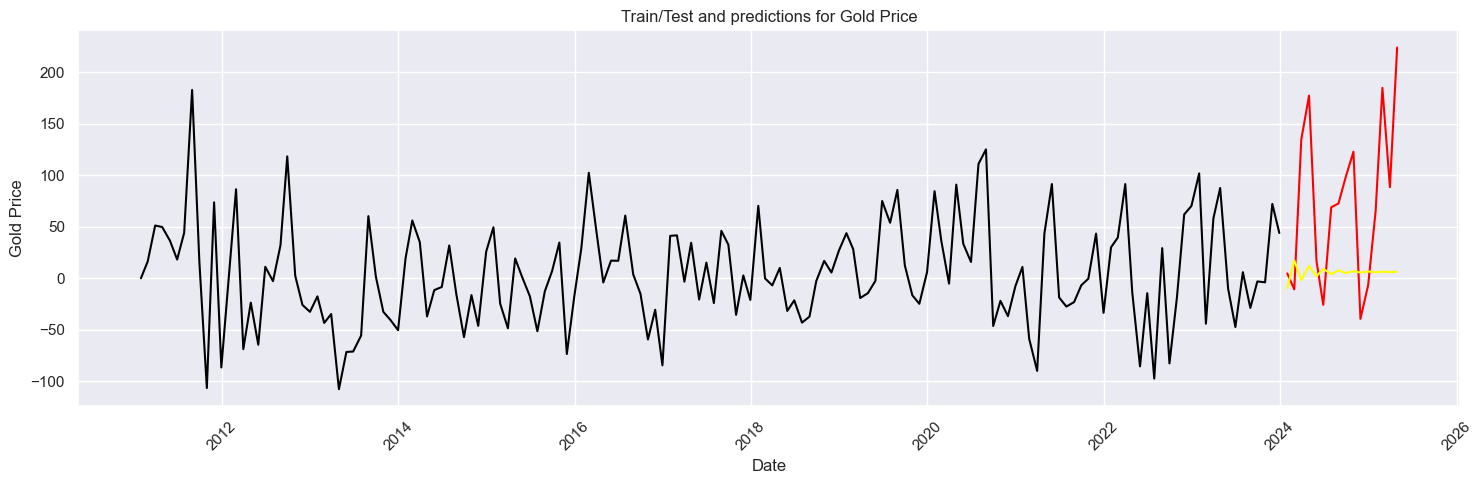

In [35]:
check_order(1,1,2)

None of the orders are of any use in the prediction - sad face emoji

In [38]:
#Time for SARIMAX
def check_seasonal_order(p,d,q):
    y = data_predict['Price_diff']
    from statsmodels.tsa.statespace.sarimax import SARIMAX
    SARIMAmodel = SARIMAX(y, order = (p,d,q),seasonal_order = (0,0,0,12))
    ResultModel = SARIMAmodel.fit()
    print(ResultModel.summary(),"\n")
    
    y_pred = ResultModel.get_forecast(len(test.index))
    y_pred_df = y_pred.conf_int(alpha = 0.05) 
    y_pred_df["Predictions"] = ResultModel.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])
    y_pred_df.index = test.index
    y_pred_out = y_pred_df["Predictions"] 
    
    
    from sklearn.metrics import mean_squared_error
    sarima_rmse = np.sqrt(mean_squared_error(test['Price_diff'].values, y_pred_df["Predictions"]))
    print("RMSE: ",sarima_rmse,'\n')
       
    ResultModel.plot_diagnostics(figsize = (20,12))

     
    sns.set()
    plt.subplots(figsize = (15,10))
    plt.plot(train,color ='black',label = 'Train')
    plt.plot(test,color = 'red',label = 'Test')
    plt.plot(y_pred_out, color='green', label = 'ARIMA Predictions')
    plt.ylabel("Gold Price")
    plt.xlabel("Date")
    plt.xticks(rotation = 45)
    plt.title("Train/Test and predictions for Gold Price")
    plt.show()


                               SARIMAX Results                                
Dep. Variable:             Price_diff   No. Observations:                  172
Model:               SARIMAX(2, 1, 2)   Log Likelihood                -922.551
Date:                Wed, 14 May 2025   AIC                           1855.103
Time:                        21:38:59   BIC                           1870.811
Sample:                    01-31-2011   HQIC                          1861.476
                         - 04-30-2025                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6849      0.092     -7.424      0.000      -0.866      -0.504
ar.L2          0.1188      0.099      1.198      0.231      -0.076       0.313
ma.L1          0.0457      0.051      0.894      0.3

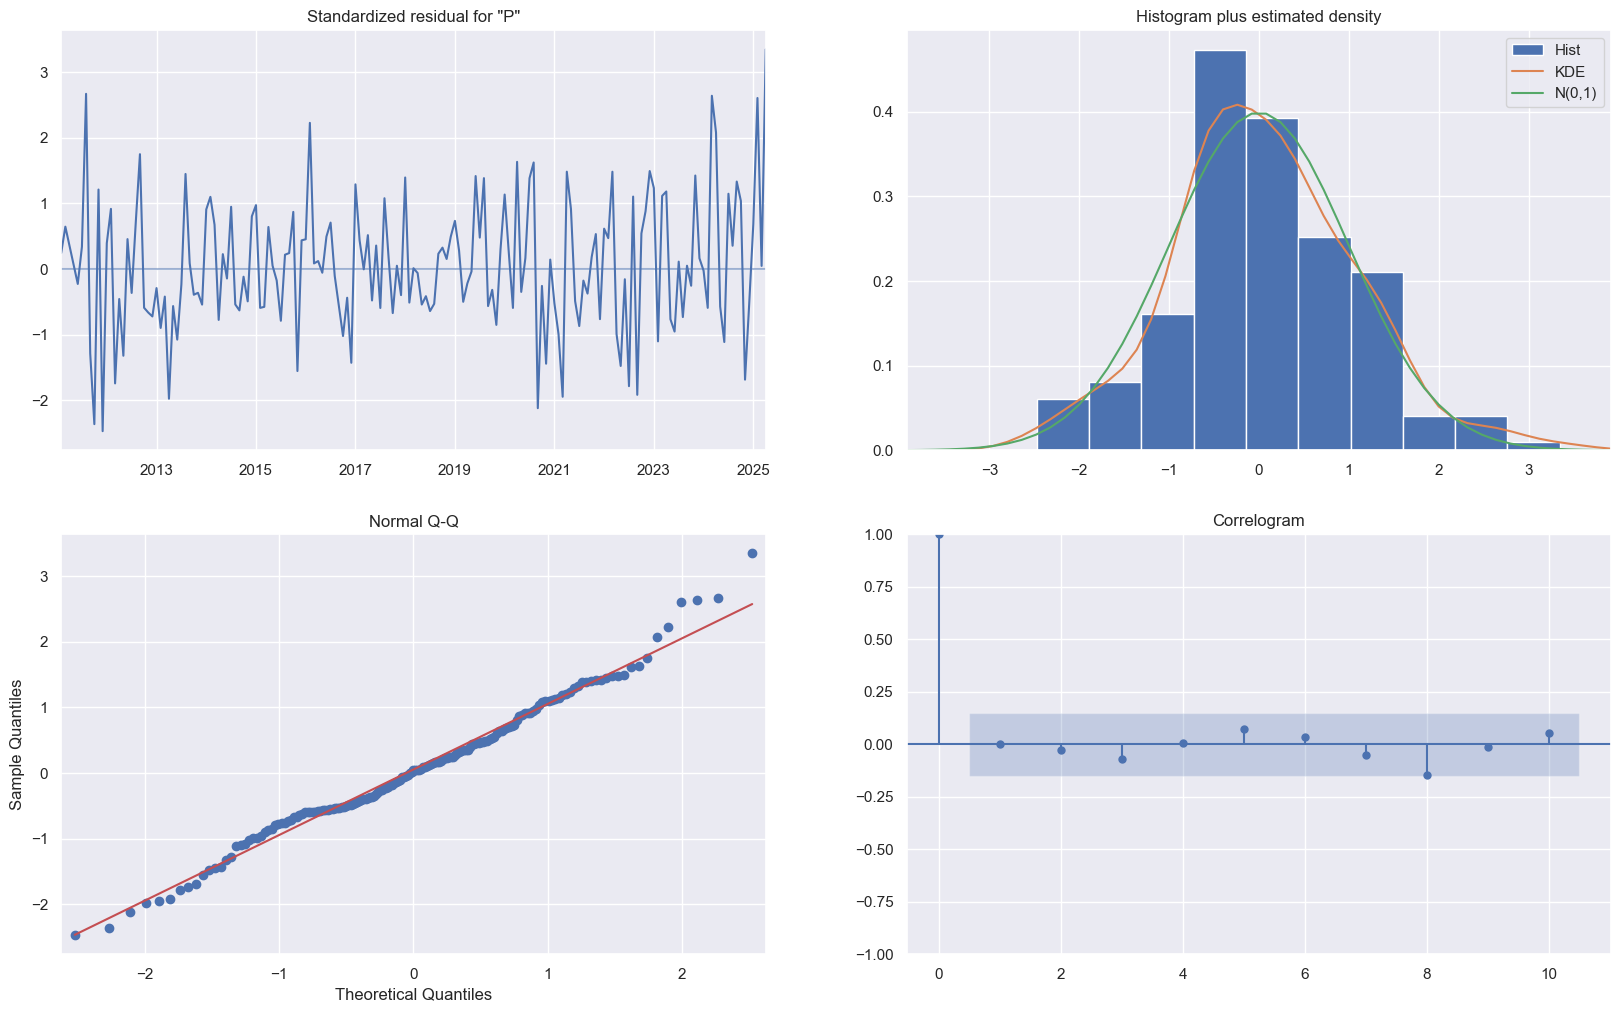

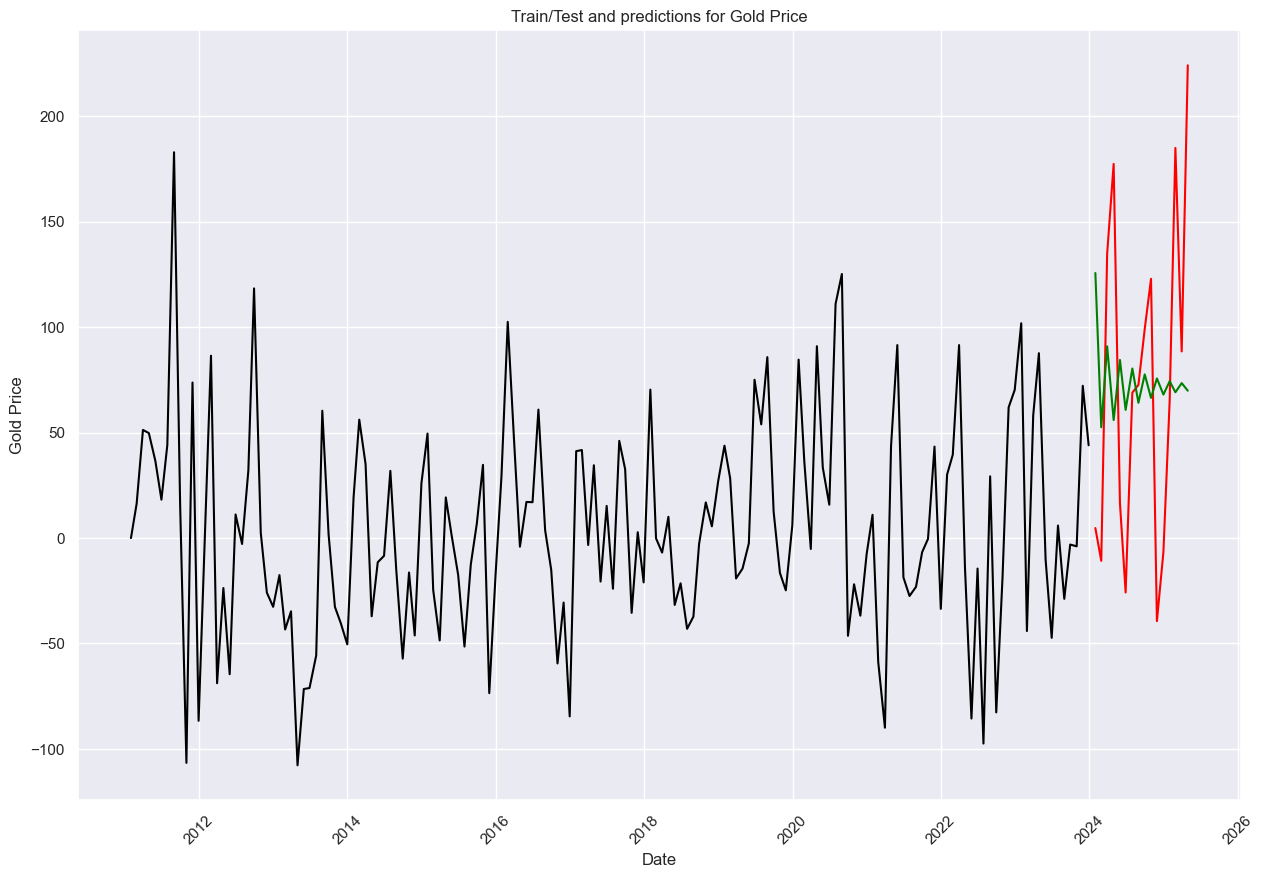

In [39]:
check_seasonal_order(2,1,2)

SARIMAX is also not predicting well - well well well

In [40]:
data_predict = data_predict.reset_index().drop(columns = 'Price_diff')
data_predict.head()

Date  Year  Month  Day    Price
0 2011-01-31  2011      1   31  1356.40
1 2011-02-28  2011      2   28  1372.73
2 2011-03-31  2011      3   31  1424.01
3 2011-04-29  2011      4   29  1473.81
4 2011-05-31  2011      5   31  1510.44

In [41]:
from sklearn.model_selection import train_test_split
x = data_predict[['Year','Month','Day']]
y = data_predict[['Price']]
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2, random_state = 99)

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.24604616753186825

In [42]:
model.score(x_train,y_train)

0.44580961608543535

Better than (S)ARIMA(X)

In [46]:
!pip3 install lightgbm

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 1.5/1.5 MB 10.0 MB/s eta 0:00:00



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: C:\Users\Daksh\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [52]:
!pip3 install prophet

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/13.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/13.3 MB ? eta -:--:--
    --------------------------------------- 0.3/13.3 MB ? eta -:--:--
   - -------------------------------------- 0.5/13.3 MB 1.1 MB/s eta 0:00:12
   -- ------------------------------------- 0.8/13.3 MB 1.2 MB/s eta 0:00:11
   --- ------------------------------------ 1.3/13.3 MB 1.4 MB/s eta 0:00:09
   ---- ----------------------------------- 1.6/13.3 MB 1.4 MB/s eta 0:00:09
   ----- ---------------------------------- 1.8/13.3 MB 1.5 MB/s eta 0:00:08
   ------- -------------------------------- 2.4/13.3 MB 1.6 MB/s eta 0:00:07
   -------- ------------------------------- 2.9/13.3 MB 1.7 MB/s eta 0:00:07
   ---------- ----------------------------- 3.4/13.3 MB 1.8 MB/s eta 0:00:06
   ----------- ---------------------------- 3.9/13.3 MB 1.9 MB/s eta 0:00:06
   ------------- --

ERROR: Could not install packages due to an OSError: [Errno 2] No such file or directory: 'C:\\Users\\Daksh\\AppData\\Local\\Packages\\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\\LocalCache\\local-packages\\Python313\\site-packages\\prophet\\stan_model\\cmdstan-2.33.1\\stan\\lib\\stan_math\\lib\\tbb_2020.3\\include\\tbb\\internal\\_deprecated_header_message_guard.h'
HINT: This error might have occurred since this system does not have Windows Long Path support enabled. You can find information on how to enable this at https://pip.pypa.io/warnings/enable-long-paths


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: C:\Users\Daksh\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [47]:

#Finding best models

from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
from xgboost import XGBRegressor
xgb = XGBRegressor()
from lightgbm import LGBMRegressor
lgbm = LGBMRegressor()

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

from sklearn.metrics import mean_squared_error

In [48]:
def evaluation_metrics(model):
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    mse = mean_squared_error(y_test,y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test,y_pred)
    r2score = r2_score(y_test,y_pred)
    trainscore = model.score(x_train,y_train)
    
    print(f'Mean Squared Error = {mse}')
    print(f'Mean Absolute Error = {mae}')
    print(f'Root Mean Squared Error = {rmse}')
    print(f'r2 score = {r2score}')
    
    Comparison = x_test.copy("deep")
    Comparison['Actual Price'] = y_test
    Comparison['Predicted Price'] = y_pred
    
    sns.lineplot(Comparison, x = 'Year',y = 'Actual Price')
    sns.lineplot(Comparison, x = 'Year',y = 'Predicted Price')
    plt.legend(['Actual Price','','Predicted Price'])
    plt.show()
    
    return {'Training Score': trainscore,
           'Testing Score': r2score}

results = {}

Mean Squared Error = 90846.07966490962
Mean Absolute Error = 254.96113017716272
Root Mean Squared Error = 301.40683413769773
r2 score = 0.24604616753186825


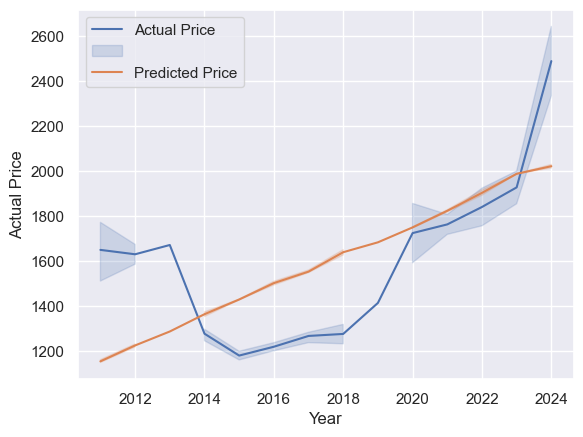

In [49]:
results['Linear Regression'] = evaluation_metrics(model)

Mean Squared Error = 5186.690017142852
Mean Absolute Error = 56.10742857142854
Root Mean Squared Error = 72.01867825184556
r2 score = 0.9569543910901469


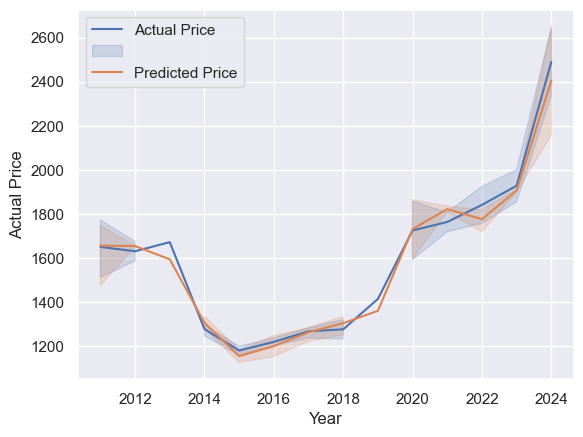

In [50]:
results['Decision Tree Regressor'] = evaluation_metrics(dtr)

Mean Squared Error = 3753.193141762335
Mean Absolute Error = 47.15209142857176
Root Mean Squared Error = 61.26330991517137
r2 score = 0.968851332235112


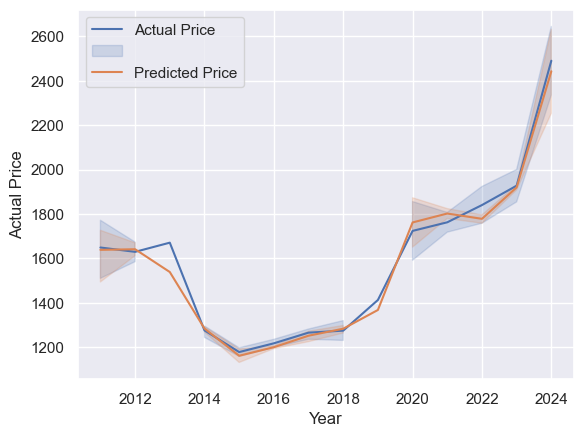

In [51]:
results['Random Forest Regressor'] = evaluation_metrics(rfr)

Mean Squared Error = 3744.74462890625
Mean Absolute Error = 47.554176330566406
Root Mean Squared Error = 61.19431859990149
r2 score = 0.968921422958374


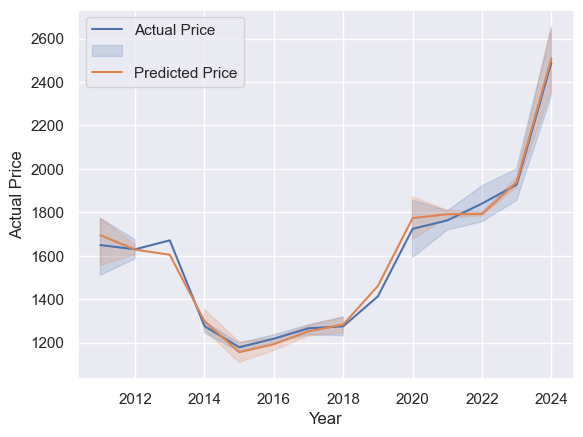

In [55]:
results['XGB Regressor'] = evaluation_metrics(xgb)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000369 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 34
[LightGBM] [Info] Number of data points in the train set: 137, number of used features: 3
[LightGBM] [Info] Start training from score 1605.817301
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

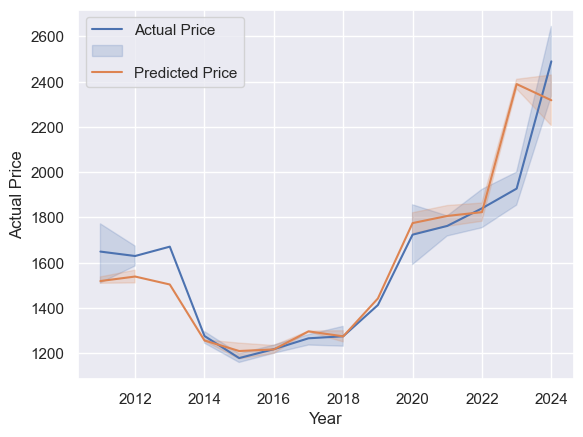

In [56]:
results['LGBM Regressor'] = evaluation_metrics(lgbm)

In [57]:
resultsdf = pd.DataFrame(results)
resultsdf

Linear Regression  Decision Tree Regressor  \
Training Score           0.445810                 1.000000   
Testing Score            0.246046                 0.956954   

                Random Forest Regressor  XGB Regressor  LGBM Regressor  
Training Score                 0.995604       0.999999        0.816043  
Testing Score                  0.968851       0.968921        0.801638

In [58]:
#I will try Prophet now

time_data = data_predict[['Date','Price']]
time_data.columns = ['ds','y']
time_data.head()

ds        y
0 2011-01-31  1356.40
1 2011-02-28  1372.73
2 2011-03-31  1424.01
3 2011-04-29  1473.81
4 2011-05-31  1510.44

In [59]:
from prophet import Prophet
m = Prophet(daily_seasonality=True)
model_fit = m.fit(time_data)

forecast = model_fit.predict(time_data)
forecast[['ds','yhat','yhat_upper','yhat_lower']].tail()

22:01:01 - cmdstanpy - INFO - Chain [1] start processing
22:01:01 - cmdstanpy - INFO - Chain [1] done processing


ds         yhat   yhat_upper   yhat_lower
167 2024-12-31  2516.230530  2703.496726  2322.373913
168 2025-01-31  2487.626877  2673.854423  2314.327867
169 2025-02-28  2527.327913  2724.008797  2348.228954
170 2025-03-31  2588.959923  2771.147898  2394.574999
171 2025-04-30  2656.884638  2824.014907  2475.182447

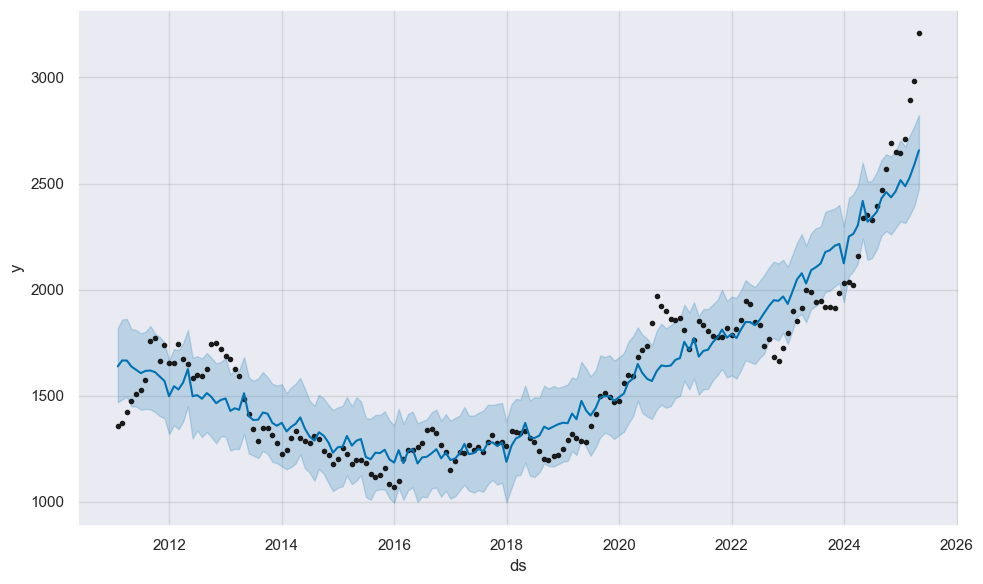

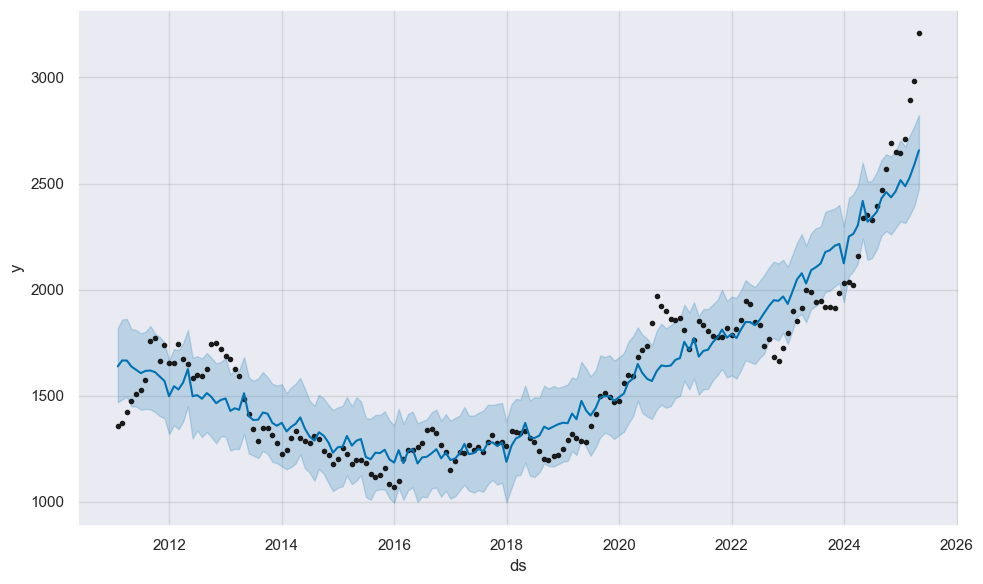

In [60]:
model_fit.plot(forecast)

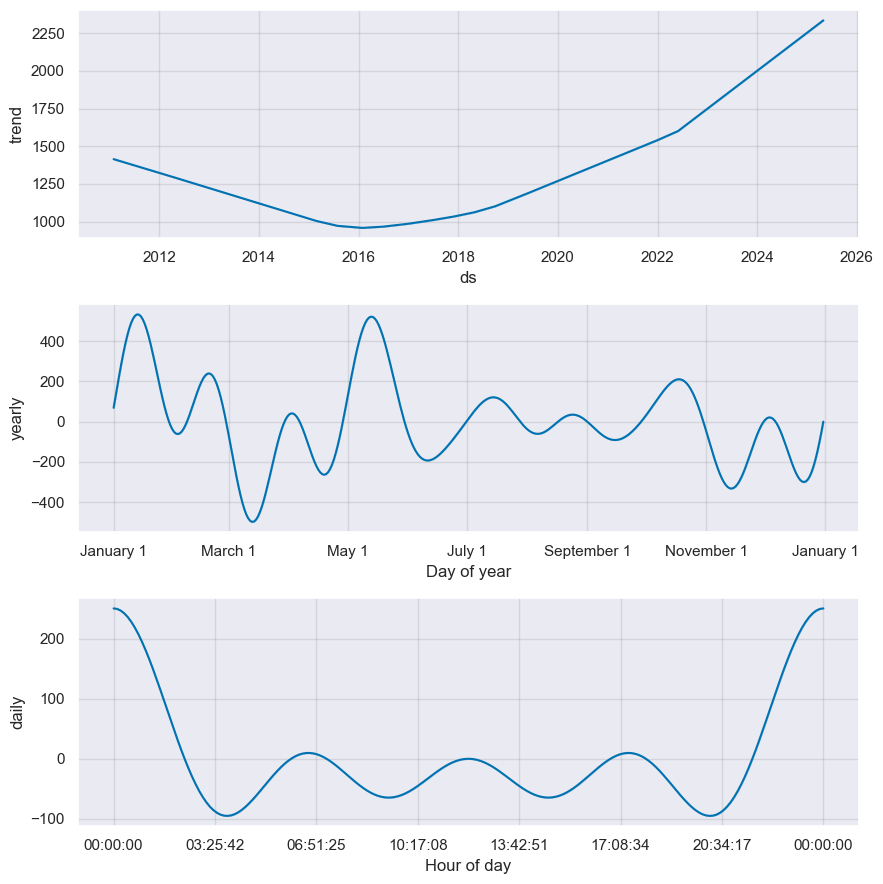

In [61]:
model_fit.plot_components(forecast);

In [62]:
#Forecasting for next 6 months
m2 = Prophet(daily_seasonality=True)
m2.fit(time_data)
future = m2.make_future_dataframe(periods = 336)
future.tail(10)

22:01:44 - cmdstanpy - INFO - Chain [1] start processing
22:01:44 - cmdstanpy - INFO - Chain [1] done processing


ds
498 2026-03-23
499 2026-03-24
500 2026-03-25
501 2026-03-26
502 2026-03-27
503 2026-03-28
504 2026-03-29
505 2026-03-30
506 2026-03-31
507 2026-04-01

In [63]:
forecast2 = m2.predict(future)
forecast2[['ds','yhat','yhat_upper','yhat_lower']].tail()

ds         yhat   yhat_upper   yhat_lower
503 2026-03-28  2763.689301  2944.726008  2591.216616
504 2026-03-29  2793.137378  2979.173371  2613.297319
505 2026-03-30  2817.649447  3002.187202  2631.843578
506 2026-03-31  2836.764346  3024.678792  2646.750114
507 2026-04-01  2850.172546  3039.628521  2676.000924

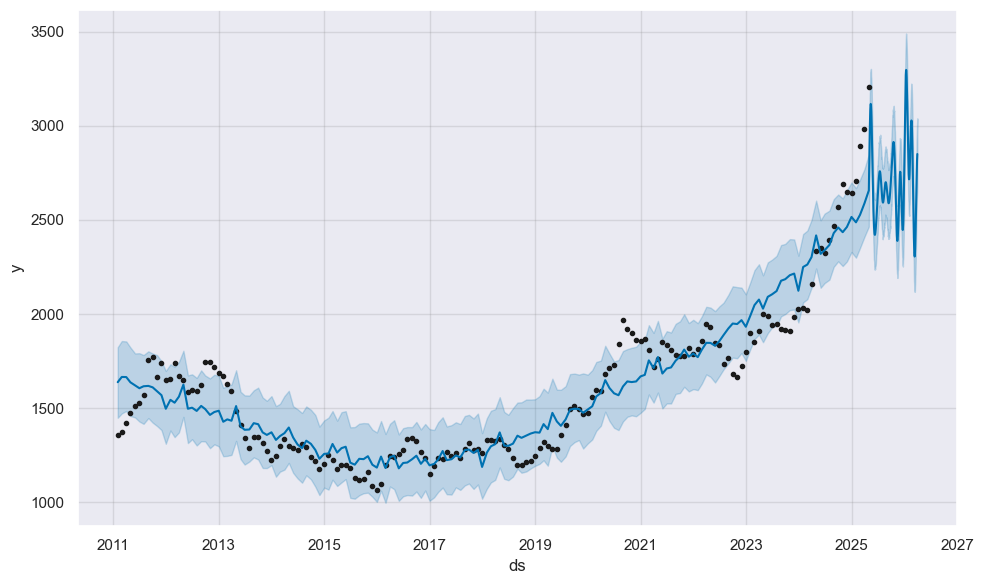

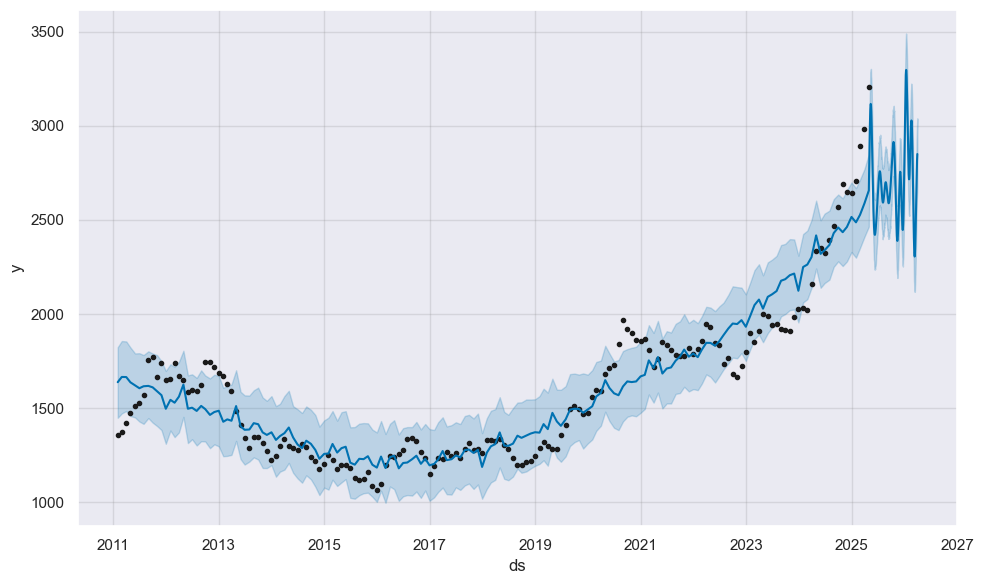

In [64]:
m2.plot(forecast2)

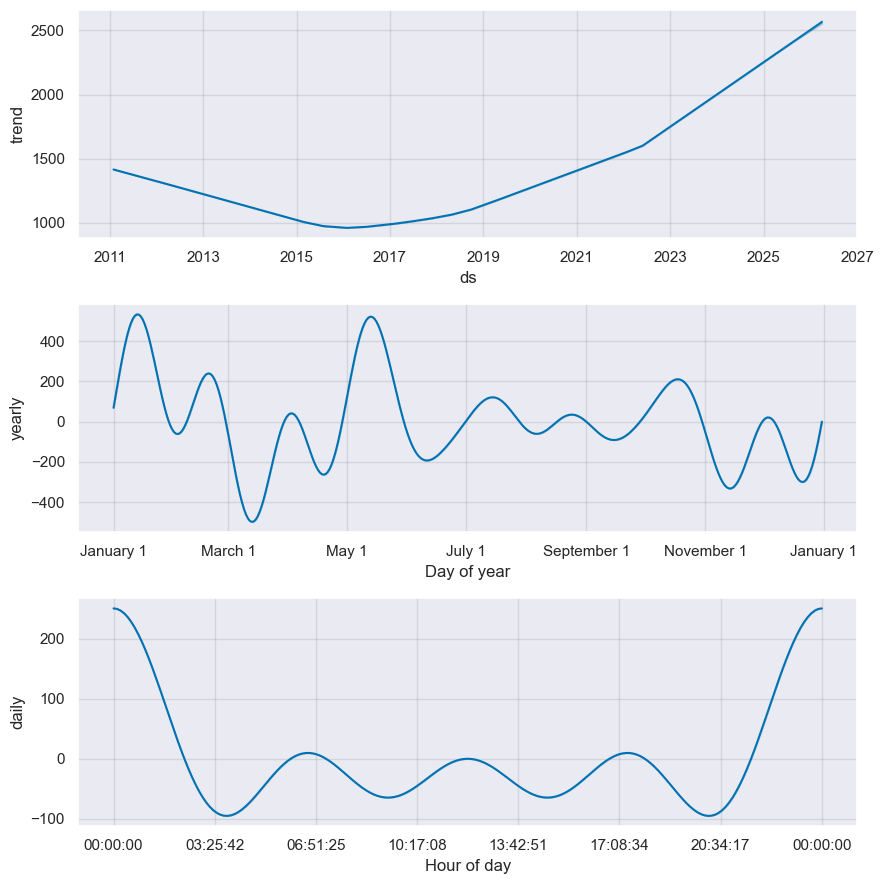

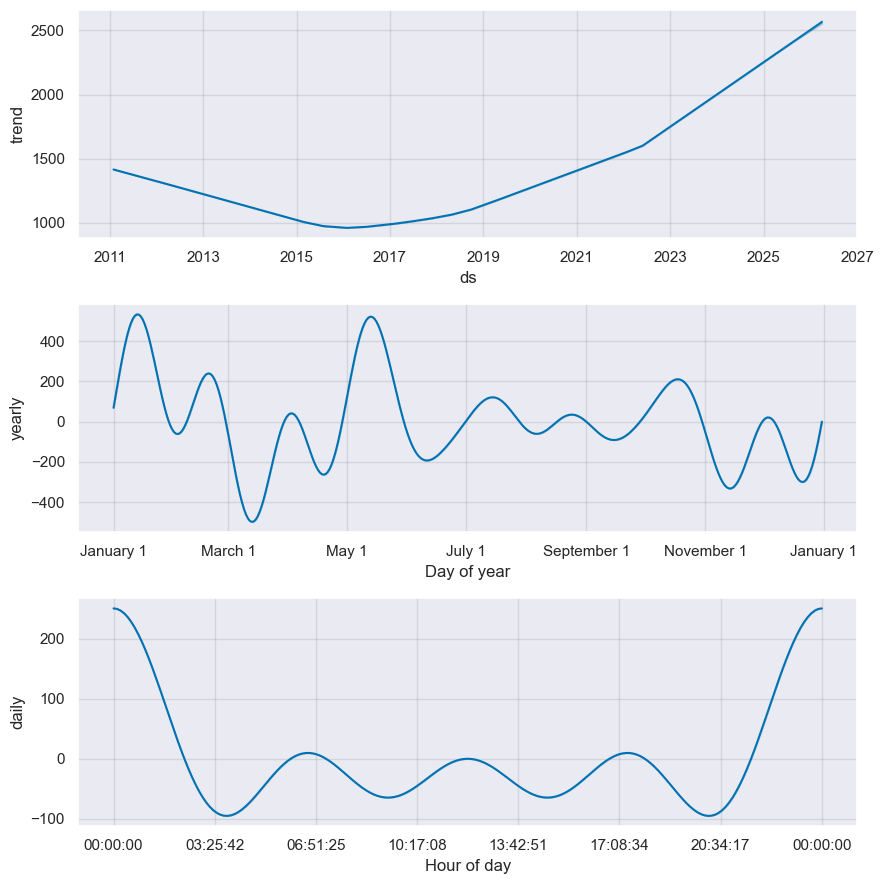

In [65]:
m2.plot_components(forecast2)

In [66]:
predictions = forecast2[['ds','yhat']]
predictions = predictions.rename(columns = {'ds':'Date','yhat':'Price'})
predictions.head()

Date        Price
0 2011-01-31  1638.664633
1 2011-02-28  1666.416626
2 2011-03-31  1665.917830
3 2011-04-29  1637.867992
4 2011-05-31  1621.793335

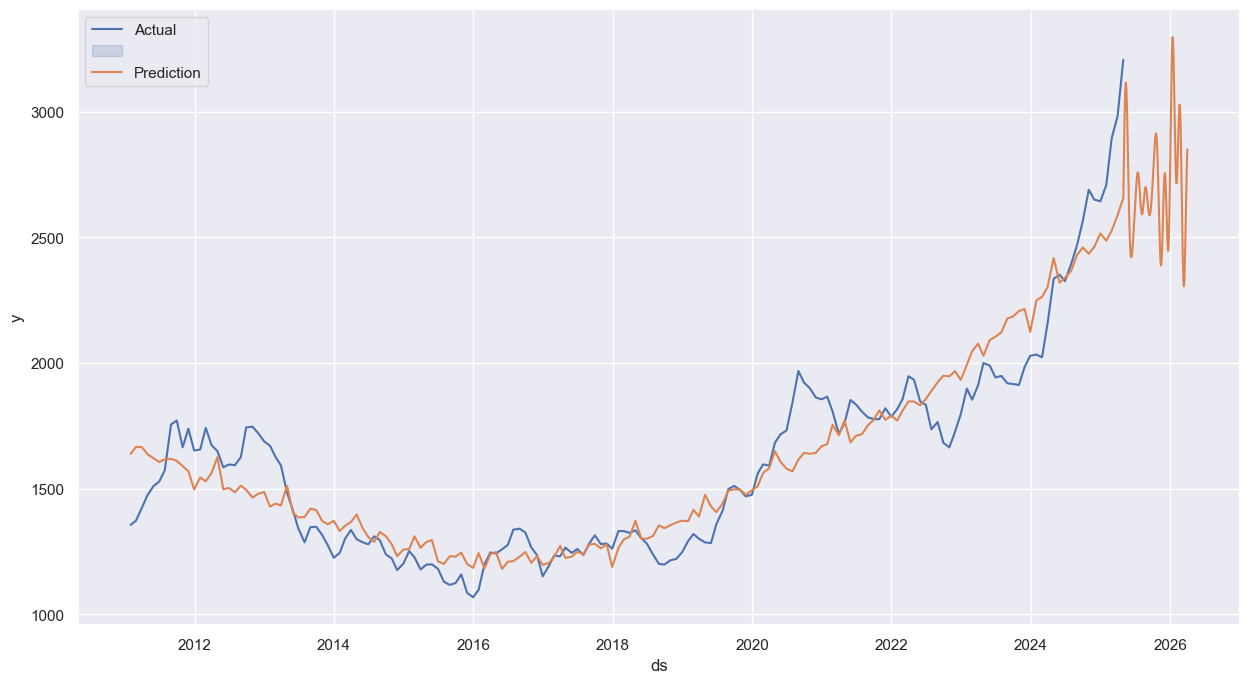

In [67]:
plt.subplots(figsize = (15,8))
sns.lineplot(time_data,x = 'ds',y='y',legend='full')
sns.lineplot(predictions,x = 'Date',y = 'Price',legend='full')
plt.legend(labels = ['Actual','','Prediction'])
plt.show()

In [68]:
predictions['Date'] = pd.to_datetime(predictions['Date'])
predictions['Year'] = predictions['Date'].dt.year
predictions['Month'] = predictions['Date'].dt.month
predictions['Day'] = predictions['Date'].dt.day

Mean Squared Error = 3808.1427661628964
Mean Absolute Error = 48.81130285714309
Root Mean Squared Error = 61.710151240803945
r2 score = 0.9683952918637244


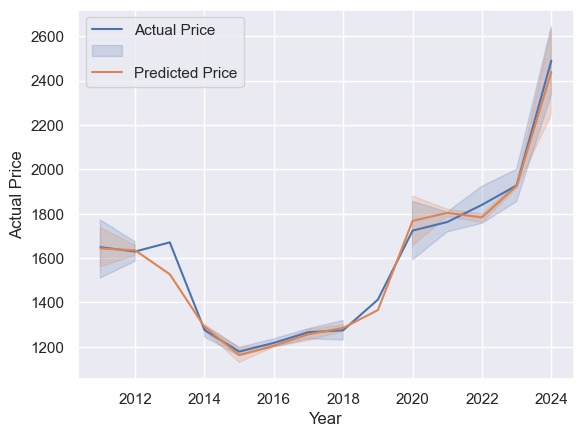

In [69]:
x_time  = predictions.drop(columns=['Date','Price'])
y_time = predictions[['Price']]

x_time_train,x_time_test,y_time_train,y_time_test = train_test_split(x_time,y_time,test_size=0.2,random_state=43)
rfr_time_model = RandomForestRegressor()
rfr_time_model.fit(x_time_train,y_time_train)
rfr_time_pred = rfr_time_model.predict(x_time_test)

results['Random Forest Evaluation Regressor'] = evaluation_metrics(rfr_time_model)

del results['Linear Regression']
del results['Decision Tree Regressor']
del results['XGB Regressor']
del results['LGBM Regressor']

In [70]:
CompareRFR = pd.DataFrame(results)
CompareRFR

Random Forest Regressor  Random Forest Evaluation Regressor
Training Score                 0.995604                            0.995594
Testing Score                  0.968851                            0.968395

Forecasting with the wholw data set

In [72]:
DataAll = data[['Date','Year','Month','Day','Price']]
DataAll = DataAll.dropna().reset_index(drop=True)
DataAll.head()

Date  Year  Month  Day   Price
0 1978-01-31  1978      1   31  207.83
1 1978-02-28  1978      2   28  227.27
2 1978-03-31  1978      3   31  245.67
3 1978-04-28  1978      4   28  242.05
4 1978-05-31  1978      5   31  239.16

In [73]:
x_all = DataAll[['Year','Month','Day']]
y_all = DataAll[['Price']]
x_train,x_test,y_train,y_test = train_test_split(x_all,y_all,test_size = 0.2, random_state = 43)

AllDataResults = {}

Mean Squared Error = 107119.98224972669
Mean Absolute Error = 266.951937728136
Root Mean Squared Error = 327.2918915123421
r2 score = 0.6544104765374865


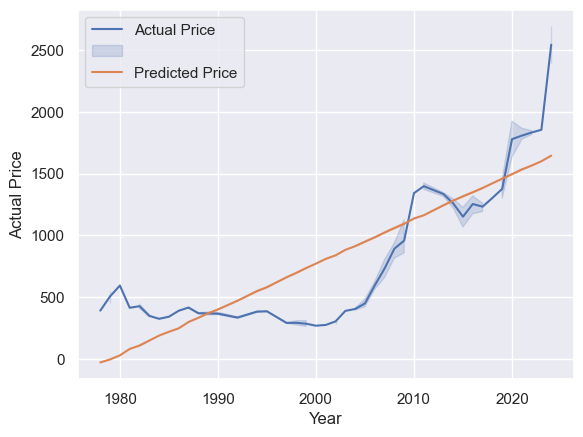

In [75]:
AllDataResults['Linear Regression'] = evaluation_metrics(model)

Mean Squared Error = 2841.777510526316
Mean Absolute Error = 34.754385964912274
Root Mean Squared Error = 53.308324964552355
r2 score = 0.9908318829500946


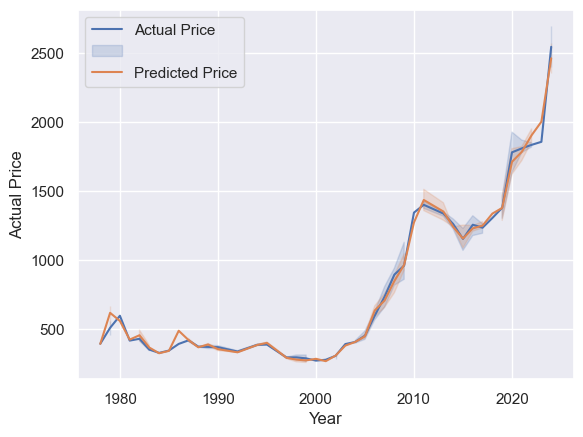

In [76]:
AllDataResults['Decision Tree Regressor'] = evaluation_metrics(dtr)

Mean Squared Error = 2956.0247986530635
Mean Absolute Error = 34.5498412280701
Root Mean Squared Error = 54.369336934094235
r2 score = 0.9904632993765037


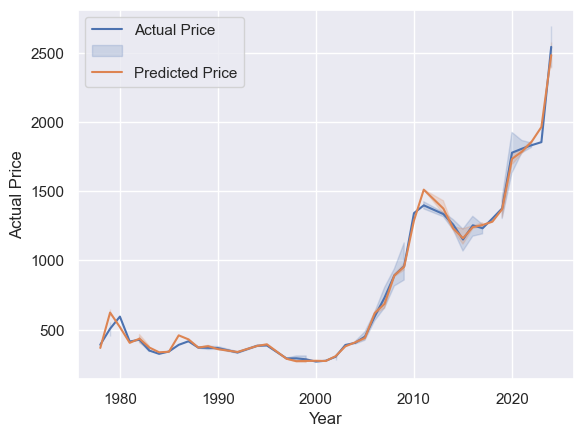

In [77]:
AllDataResults['Random Forest Regressor'] = evaluation_metrics(rfr)

Mean Squared Error = 1861.317626953125
Mean Absolute Error = 30.06353187561035
Root Mean Squared Error = 43.14299047299718
r2 score = 0.9939950108528137


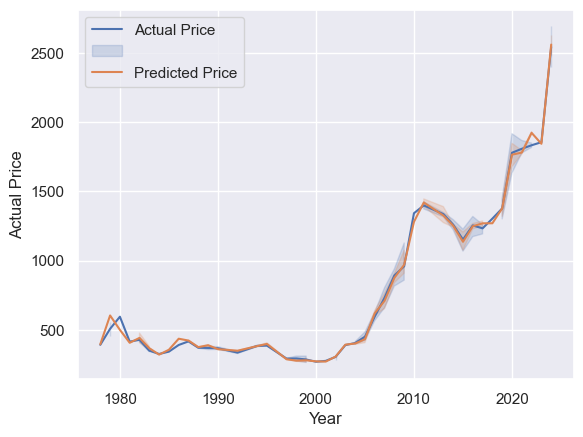

In [78]:
AllDataResults['XGB Regressor'] = evaluation_metrics(xgb)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000369 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 69
[LightGBM] [Info] Number of data points in the train set: 454, number of used features: 3
[LightGBM] [Info] Start training from score 793.446961
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -i

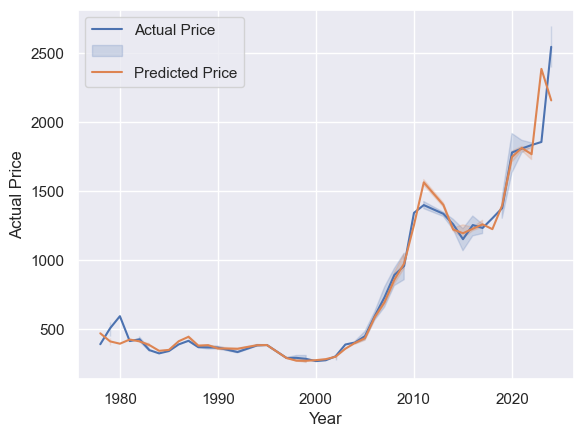

In [79]:
AllDataResults['LGBM Regressor'] = evaluation_metrics(lgbm)

In [80]:
AllDataResultsdf = pd.DataFrame(AllDataResults)
AllDataResultsdf

Linear Regression  Decision Tree Regressor  \
Training Score           0.673182                 1.000000   
Testing Score            0.654410                 0.990832   

                Random Forest Regressor  XGB Regressor  LGBM Regressor  
Training Score                 0.999119       0.999962        0.974267  
Testing Score                  0.990463       0.993995        0.968561

In [82]:
#predicting with the wholw data
time_data_all = DataAll[['Date','Price']]
time_data_all.columns = ['ds','y']
time_data_all.head()

ds       y
0 1978-01-31  207.83
1 1978-02-28  227.27
2 1978-03-31  245.67
3 1978-04-28  242.05
4 1978-05-31  239.16

In [83]:
m3 = Prophet(daily_seasonality=True)
m3.fit(time_data_all)

forecast3 = m3.predict(time_data_all)
forecast3[['ds','yhat','yhat_upper','yhat_lower']].tail()

16:44:10 - cmdstanpy - INFO - Chain [1] start processing
16:44:10 - cmdstanpy - INFO - Chain [1] done processing


ds         yhat   yhat_upper   yhat_lower
563 2024-12-31  2256.662491  2415.726202  2092.775388
564 2025-01-31  2250.428806  2406.824902  2099.482406
565 2025-02-28  2284.358366  2440.672254  2129.478526
566 2025-03-31  2293.317722  2458.034056  2152.158852
567 2025-04-30  2315.428872  2467.077044  2144.347919

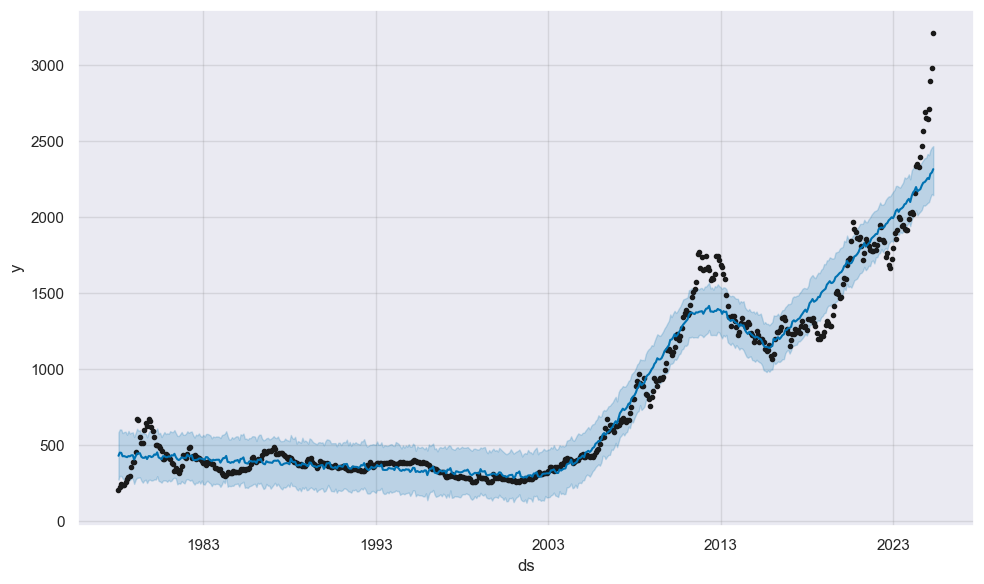

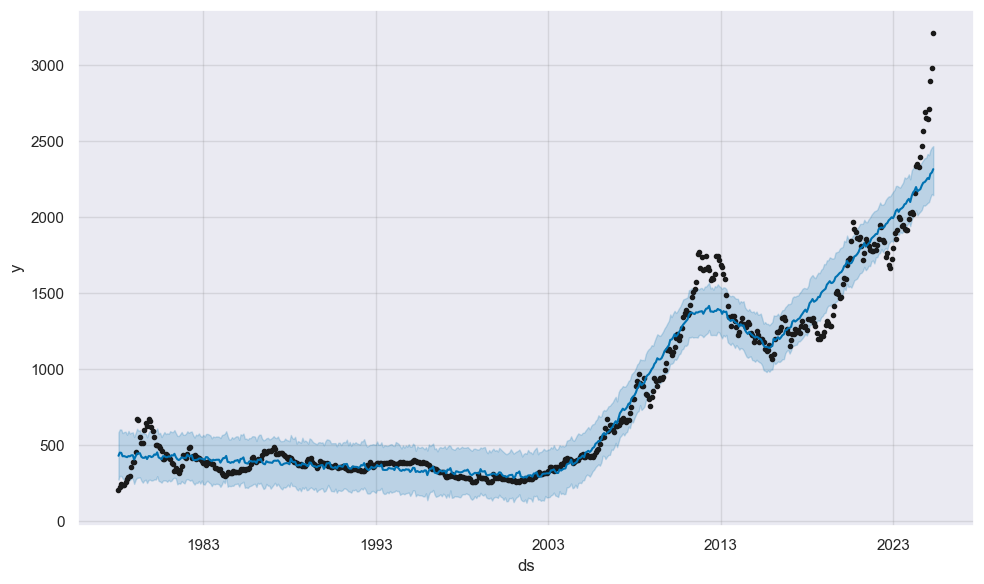

In [84]:
m3.plot(forecast3)

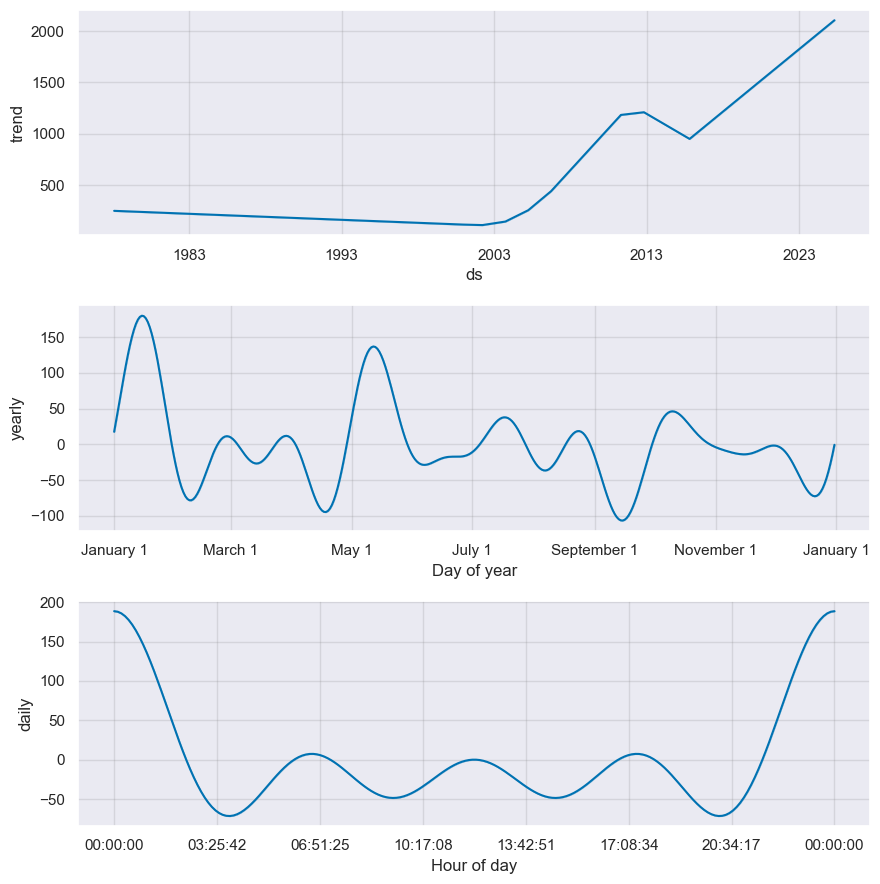

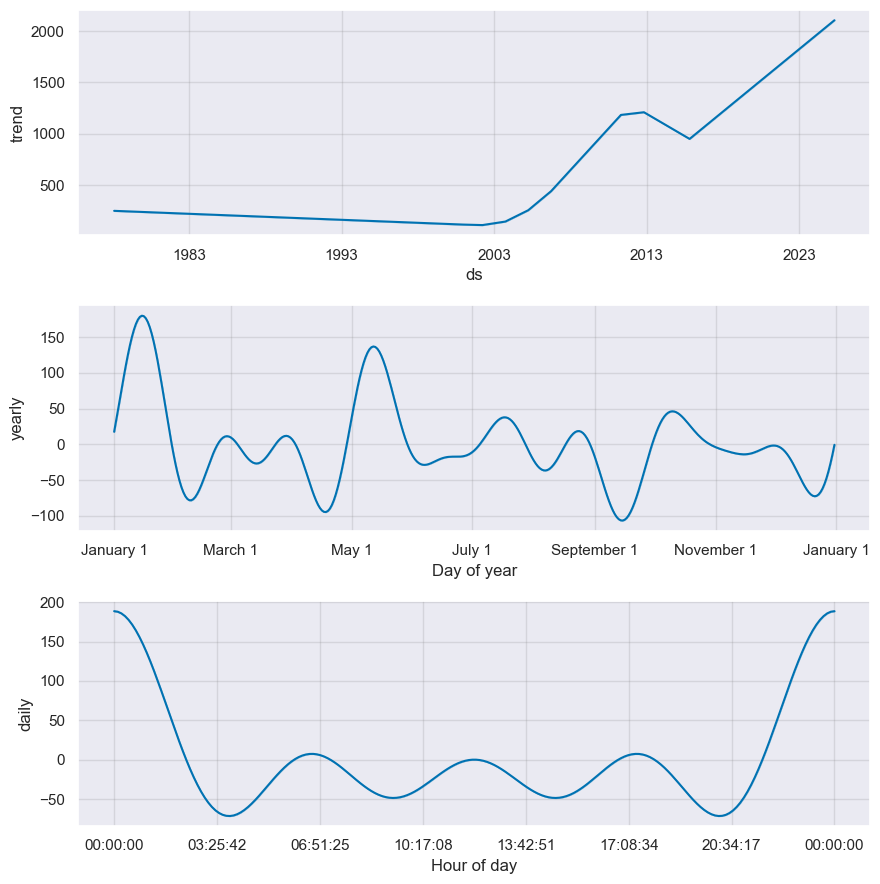

In [85]:
m3.plot_components(forecast3)

In [86]:
m4 = Prophet(daily_seasonality=True)
m4.fit(time_data_all)
future2 = m4.make_future_dataframe(periods = 336)
future2.tail(10)

16:44:37 - cmdstanpy - INFO - Chain [1] start processing
16:44:37 - cmdstanpy - INFO - Chain [1] done processing


ds
894 2026-03-23
895 2026-03-24
896 2026-03-25
897 2026-03-26
898 2026-03-27
899 2026-03-28
900 2026-03-29
901 2026-03-30
902 2026-03-31
903 2026-04-01

In [87]:
forecast4 = m4.predict(future2)
forecast4[['ds','yhat','yhat_upper','yhat_lower']].tail()

ds         yhat   yhat_upper   yhat_lower
899 2026-03-28  2415.285892  2580.702299  2256.228359
900 2026-03-29  2416.273040  2565.229096  2249.571305
901 2026-03-30  2416.257489  2565.030393  2256.788969
902 2026-03-31  2415.175060  2563.706649  2243.635276
903 2026-04-01  2412.992982  2565.111265  2268.983695

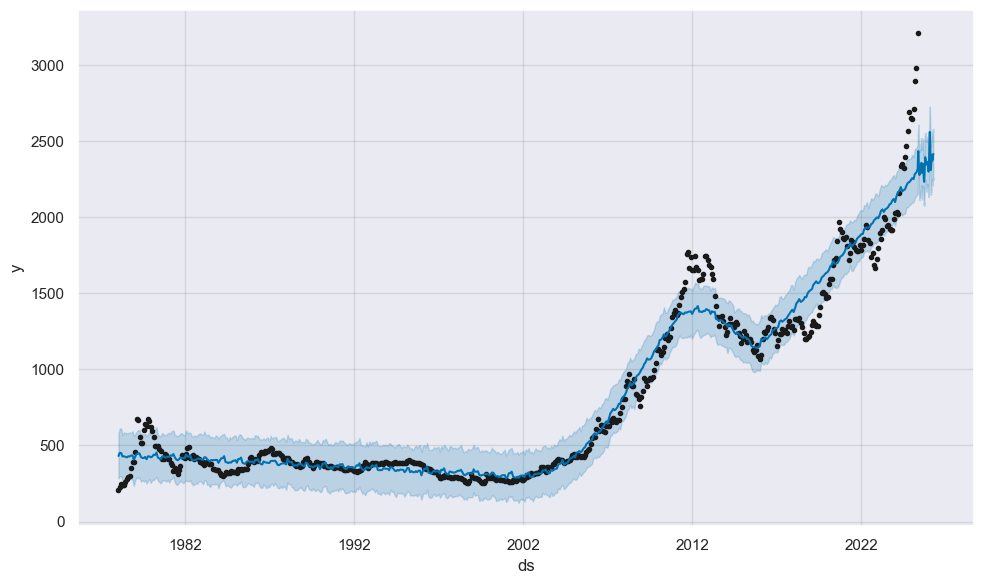

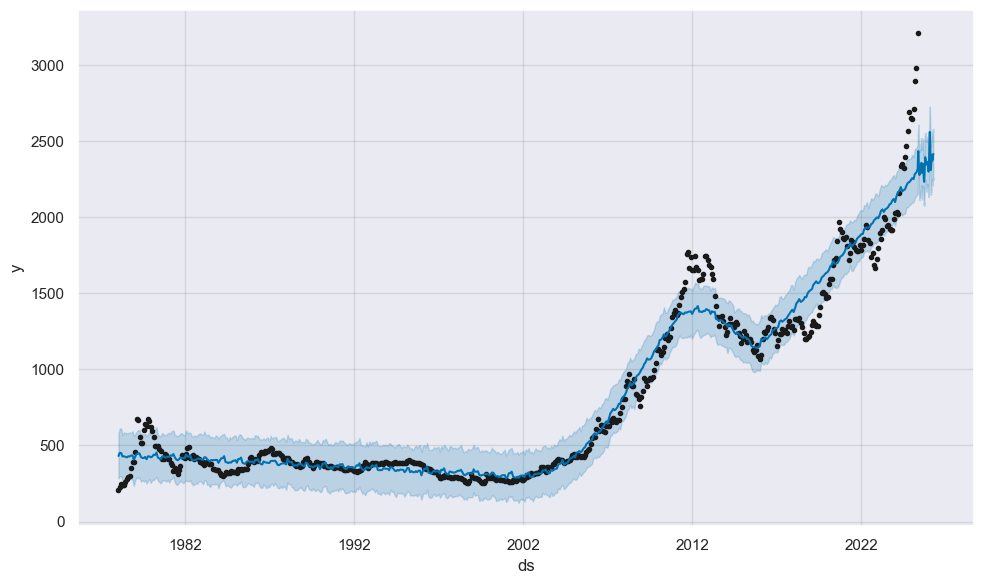

In [88]:
m4.plot(forecast4)

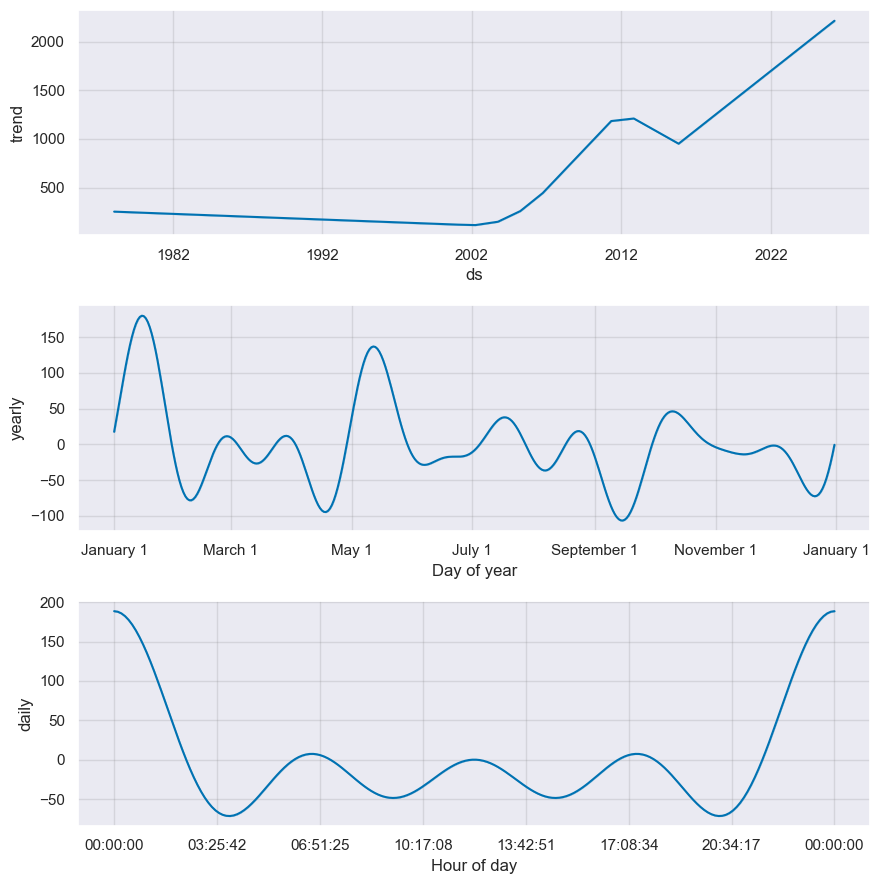

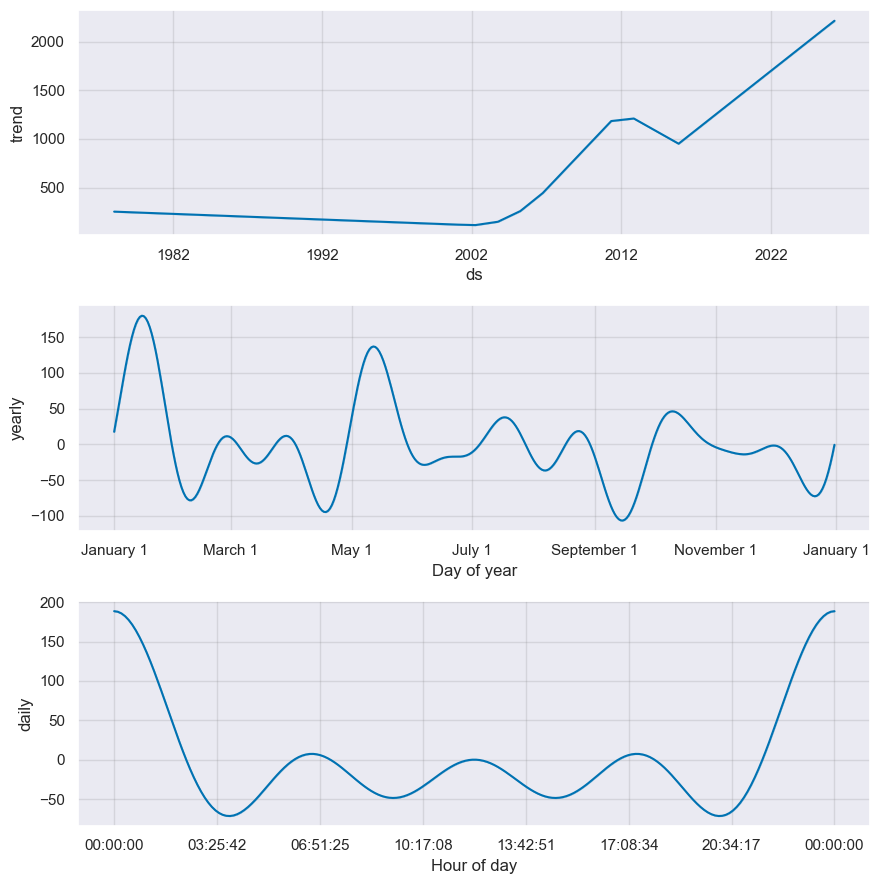

In [89]:
m4.plot_components(forecast4)

In [90]:
predictions2 = forecast4[['ds','yhat']]
predictions2 = predictions2.rename(columns = {'ds':'Date','yhat':'Price'})
predictions2.head()

Date       Price
0 1978-01-31  431.168979
1 1978-02-28  451.906568
2 1978-03-31  450.378521
3 1978-04-28  427.834016
4 1978-05-31  428.907293

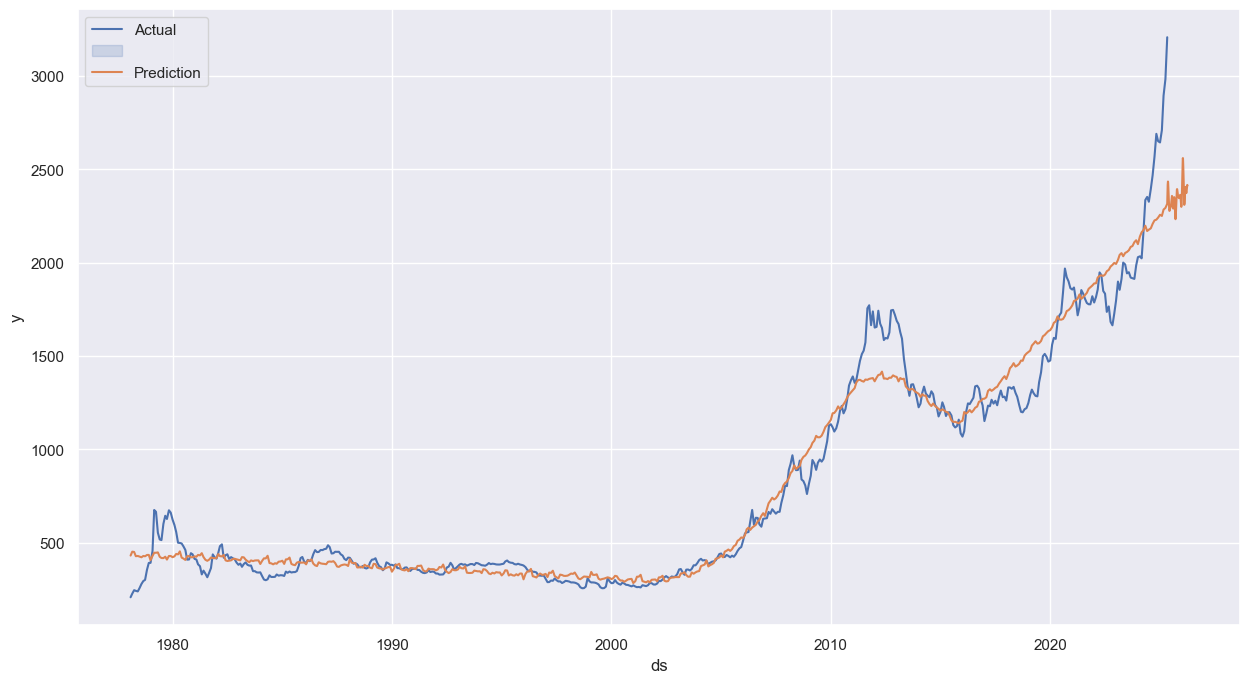

In [91]:
plt.subplots(figsize = (15,8))
sns.lineplot(time_data_all,x = 'ds',y='y',legend='full')
sns.lineplot(predictions2,x = 'Date',y = 'Price',legend='full')
plt.legend(labels = ['Actual','','Prediction'])
plt.show()

In [92]:
predictions2['Date'] = pd.to_datetime(predictions2['Date'])
predictions2['Year'] = predictions2['Date'].dt.year
predictions2['Month'] = predictions2['Date'].dt.month
predictions2['Day'] = predictions2['Date'].dt.day

Mean Squared Error = 3070.4060872921873
Mean Absolute Error = 35.55881315789463
Root Mean Squared Error = 55.41124513392735
r2 score = 0.9900942834916646


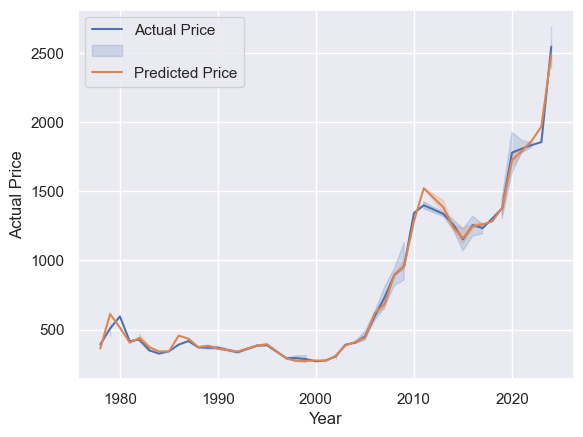

In [93]:
x_time_all  = predictions2.drop(columns=['Date','Price'])
y_time_all = predictions2[['Price']]

x_time_train,x_time_test,y_time_train,y_time_test = train_test_split(x_time_all,y_time_all,test_size=0.2,random_state=43)

rfr_time_all_model = RandomForestRegressor()
rfr_time_all_model.fit(x_time_train,y_time_train)
rfr_time_all_pred = rfr_time_all_model.predict(x_time_test)

AllDataResults['Random Forest Evaluation Regressor'] = evaluation_metrics(rfr_time_all_model)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000232 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 95
[LightGBM] [Info] Number of data points in the train set: 723, number of used features: 3
[LightGBM] [Info] Start training from score 1357.829261
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

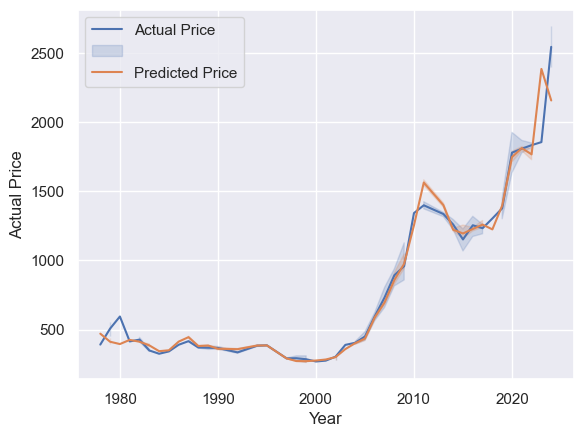

In [94]:
lgbm_time_all_model = LGBMRegressor()
lgbm_time_all_model.fit(x_time_train,y_time_train)
lgbm_time_all_pred = lgbm_time_all_model.predict(x_time_test)

AllDataResults['LGBM Evaluation Regressor'] = evaluation_metrics(lgbm_time_all_model)

In [95]:
del AllDataResults['Linear Regression']
del AllDataResults['Decision Tree Regressor']
del AllDataResults['XGB Regressor']

In [96]:
CompareAll = pd.DataFrame(AllDataResults)
CompareAll

Random Forest Regressor  LGBM Regressor  \
Training Score                 0.999119        0.974267   
Testing Score                  0.990463        0.968561   

                Random Forest Evaluation Regressor  LGBM Evaluation Regressor  
Training Score                            0.999159                   0.974267  
Testing Score                             0.990094                   0.968561

Random Forest has excellent predictive performance for the data

Next, Compare 10 Years vs. Whole Data predictions

In [97]:
data_predict.head()

Date  Year  Month  Day    Price
0 2011-01-31  2011      1   31  1356.40
1 2011-02-28  2011      2   28  1372.73
2 2011-03-31  2011      3   31  1424.01
3 2011-04-29  2011      4   29  1473.81
4 2011-05-31  2011      5   31  1510.44

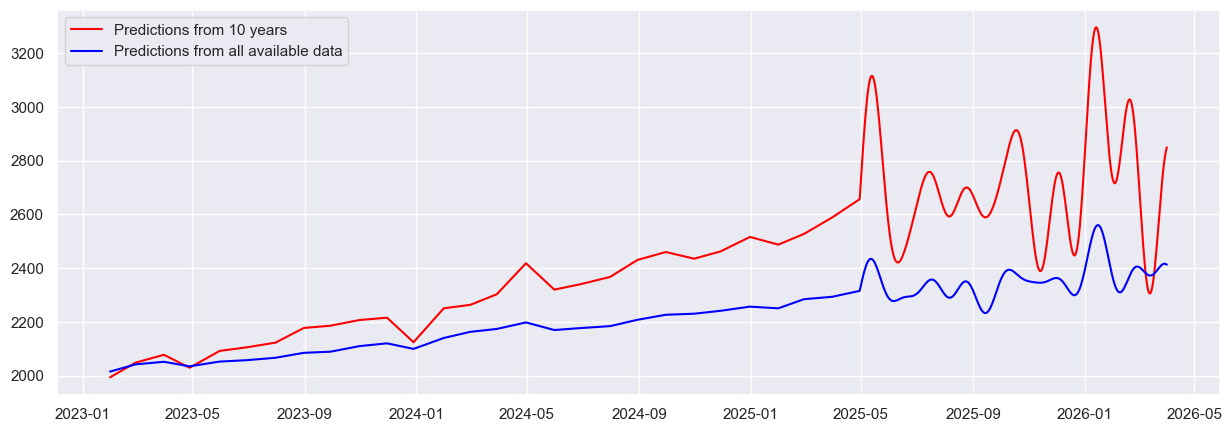

In [98]:
analysis1 = predictions[predictions['Year']>2022]
analysis2 = predictions2[predictions2['Year']>2022]

plt.subplots(figsize = (15,5))
plt.plot(analysis1['Date'],analysis1['Price'],color = 'red',label = 'Predictions from 10 years')
plt.plot(analysis2['Date'],analysis2['Price'],color = 'blue',label = 'Predictions from all available data')

plt.legend()
plt.show()

Conclusion:
1. The whole data based forecast is not always good;
2. Model has very good accuracy
3. June and August data are the best forecasting